<a href="https://colab.research.google.com/github/dchung1209/Stock-Prices-Analysis/blob/main/Final_Project_Code_Doyoung_Chung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from pandas.plotting import bootstrap_plot

# Data Import

In [ ]:
#Data Acess
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read a csv file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/GOOGL_2006-01-01_to_2018-01-01.csv')

In [ ]:
#Show the top 5 rows of a data
data.head()

Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [ ]:
#Show the last 5 rows of a data
data.tail()

Date     Open     High      Low    Close   Volume   Name
3014  2017-12-22  1070.00  1071.72  1067.64  1068.86   889446  GOOGL
3015  2017-12-26  1068.64  1068.86  1058.64  1065.85   918767  GOOGL
3016  2017-12-27  1066.60  1068.27  1058.38  1060.20  1116203  GOOGL
3017  2017-12-28  1062.25  1064.84  1053.38  1055.95   994249  GOOGL
3018  2017-12-29  1055.49  1058.05  1052.70  1053.40  1180340  GOOGL

In [ ]:
#Whole data
data

Date     Open     High      Low    Close    Volume   Name
0     2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
1     2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2     2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
3     2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
4     2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...          ...      ...      ...      ...      ...       ...    ...
3014  2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
3015  2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
3016  2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
3017  2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
3018  2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 7 columns]

# Date Cleaning

In [ ]:
#Whether any column or row value is empty
if data.any(axis=None)==True:
  #If not empty, it will print this sentence
  print("No Empty Value Found")

  #If so,
else:
  print("Column Values\n")

  #Check whether any column value is empty or not
  print(data.any(axis='columns'))
  print("---------------------")

  print("Row Values\n")
  #Check whether any row value is empty or not
  print(data.any(axis='rows'))  


No Empty Value Found


In [ ]:
#How many rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
#For each column how many unique value are there
data.value_counts()

Date        Open     High     Low      Close    Volume    Name 
2017-12-29  1055.49  1058.05  1052.70  1053.40  1180340   GOOGL    1
2009-12-24  306.77   310.07   306.44   309.55   858620    GOOGL    1
2010-01-08  296.30   301.93   294.85   301.31   4724735   GOOGL    1
2010-01-07  305.00   305.30   296.62   297.35   6418020   GOOGL    1
2010-01-06  313.24   313.24   303.48   304.43   3980628   GOOGL    1
                                                                  ..
2013-12-30  560.73   560.81   555.06   555.28   1236709   GOOGL    1
2013-12-27  560.56   560.70   557.03   559.76   1570140   GOOGL    1
2013-12-26  557.56   560.06   554.90   559.29   1338507   GOOGL    1
2013-12-24  558.04   558.18   554.60   556.48   734170    GOOGL    1
2006-01-03  211.47   218.05   209.32   217.83   13137450  GOOGL    1
Length: 3019, dtype: int64

In [ ]:
#Report mean
data.mean()

Open      4.282008e+02
High      4.318356e+02
Low       4.241303e+02
Close     4.280440e+02
Volume    3.551504e+06
dtype: float64

In [ ]:
#Report mode
data.mode()

Date    Open    High     Low   Close    Volume   Name
0     2006-01-03  214.21  236.74  227.73  250.27    521141  GOOGL
1     2006-01-04  230.23     NaN  239.49  290.29    613549    NaN
2     2006-01-05  234.80     NaN  246.75  291.79    722319    NaN
3     2006-01-06  241.49     NaN  255.25  300.70    726898    NaN
4     2006-01-09  251.25     NaN  259.76  308.56    734170    NaN
...          ...     ...     ...     ...     ...       ...    ...
3014  2017-12-22     NaN     NaN     NaN     NaN  23290879    NaN
3015  2017-12-26     NaN     NaN     NaN     NaN  27132792    NaN
3016  2017-12-27     NaN     NaN     NaN     NaN  36514857    NaN
3017  2017-12-28     NaN     NaN     NaN     NaN  39446833    NaN
3018  2017-12-29     NaN     NaN     NaN     NaN  41182889    NaN

[3019 rows x 7 columns]

In [ ]:
#Report median
data.median()

Open          310.48
High          312.81
Low           307.79
Close         310.08
Volume    2517630.00
dtype: float64

In [ ]:
#Datatypes of each column
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [ ]:
#Overall
data.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

# Date Visualization

Whether there is some cross-correlation in out data. In other words, to determine if this dataset is ok to use ARIMA model.



Text(0.5, 1.0, 'Autocorrelation plot with lag = 3')

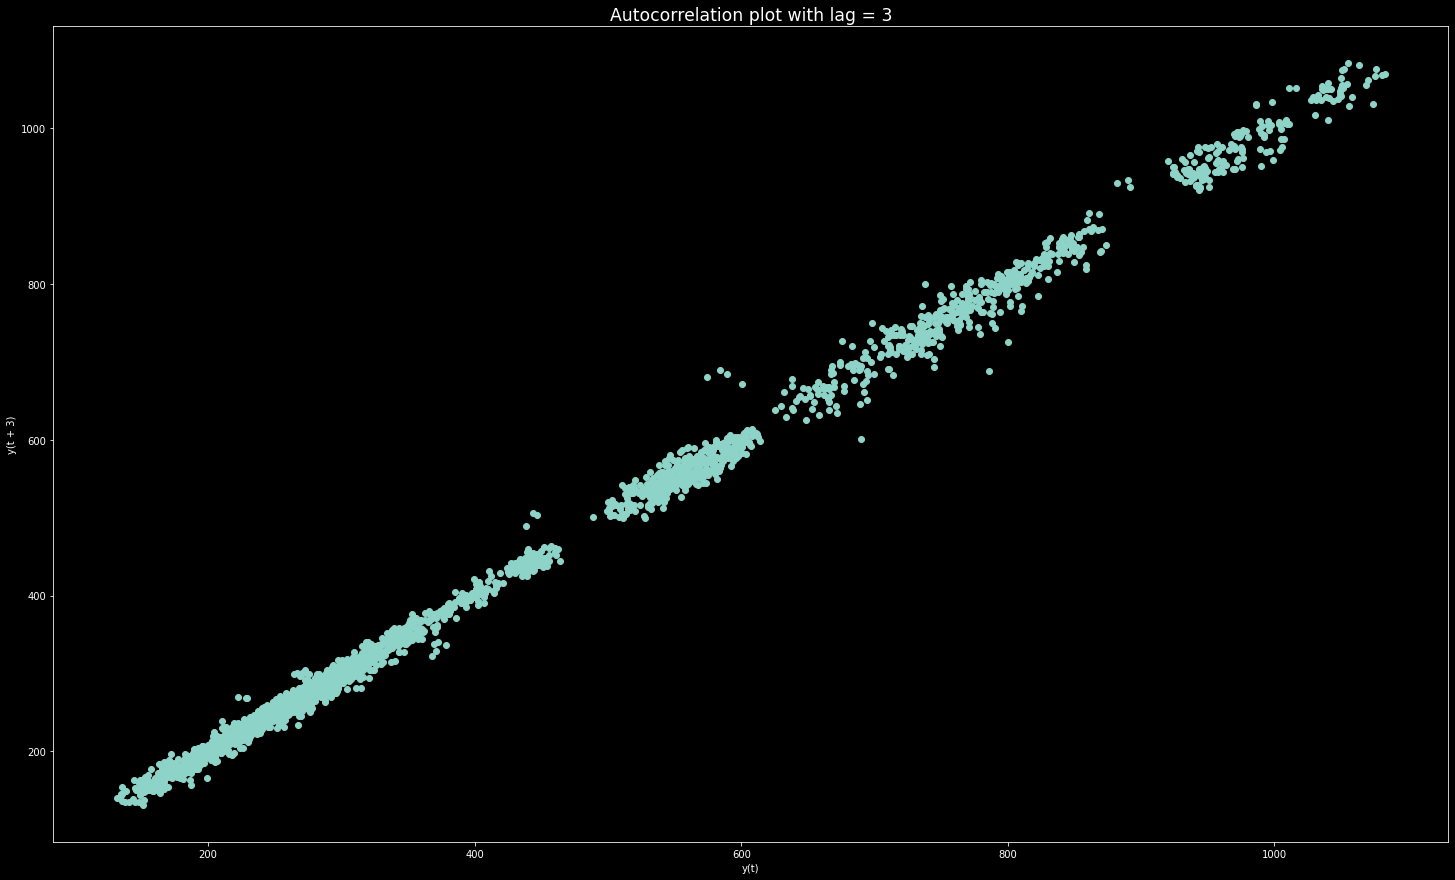

In [ ]:
#Regulate the size
plt.figure(figsize=(25,15))
#Use the dark background
plt.style.use('dark_background')

#font dict
font_title = {
         'color': 'white',
         'weight': 'normal',
         'size': 'xx-large'
         }

lag_plot(data['Open'], lag=3)

#Set the title 
plt.title('Autocorrelation plot with lag = 3', fontdict =font_title)

To see an overall trend of open&close for recent 2 years

In [ ]:
#Minimize the dataset
sample_data = data[2500:3018]
sample_data

Date     Open     High      Low    Close   Volume   Name
2500  2015-12-09   771.10   776.09   752.01   762.55  2327471  GOOGL
2501  2015-12-10   763.59   766.07   755.00   760.04  1622940  GOOGL
2502  2015-12-11   749.00   757.44   748.65   750.42  2159164  GOOGL
2503  2015-12-14   751.26   764.15   736.26   762.54  2693160  GOOGL
2504  2015-12-15   767.79   774.75   758.00   760.09  2469319  GOOGL
...          ...      ...      ...      ...      ...      ...    ...
3013  2017-12-21  1075.39  1077.52  1069.00  1070.85  1282025  GOOGL
3014  2017-12-22  1070.00  1071.72  1067.64  1068.86   889446  GOOGL
3015  2017-12-26  1068.64  1068.86  1058.64  1065.85   918767  GOOGL
3016  2017-12-27  1066.60  1068.27  1058.38  1060.20  1116203  GOOGL
3017  2017-12-28  1062.25  1064.84  1053.38  1055.95   994249  GOOGL

[518 rows x 7 columns]

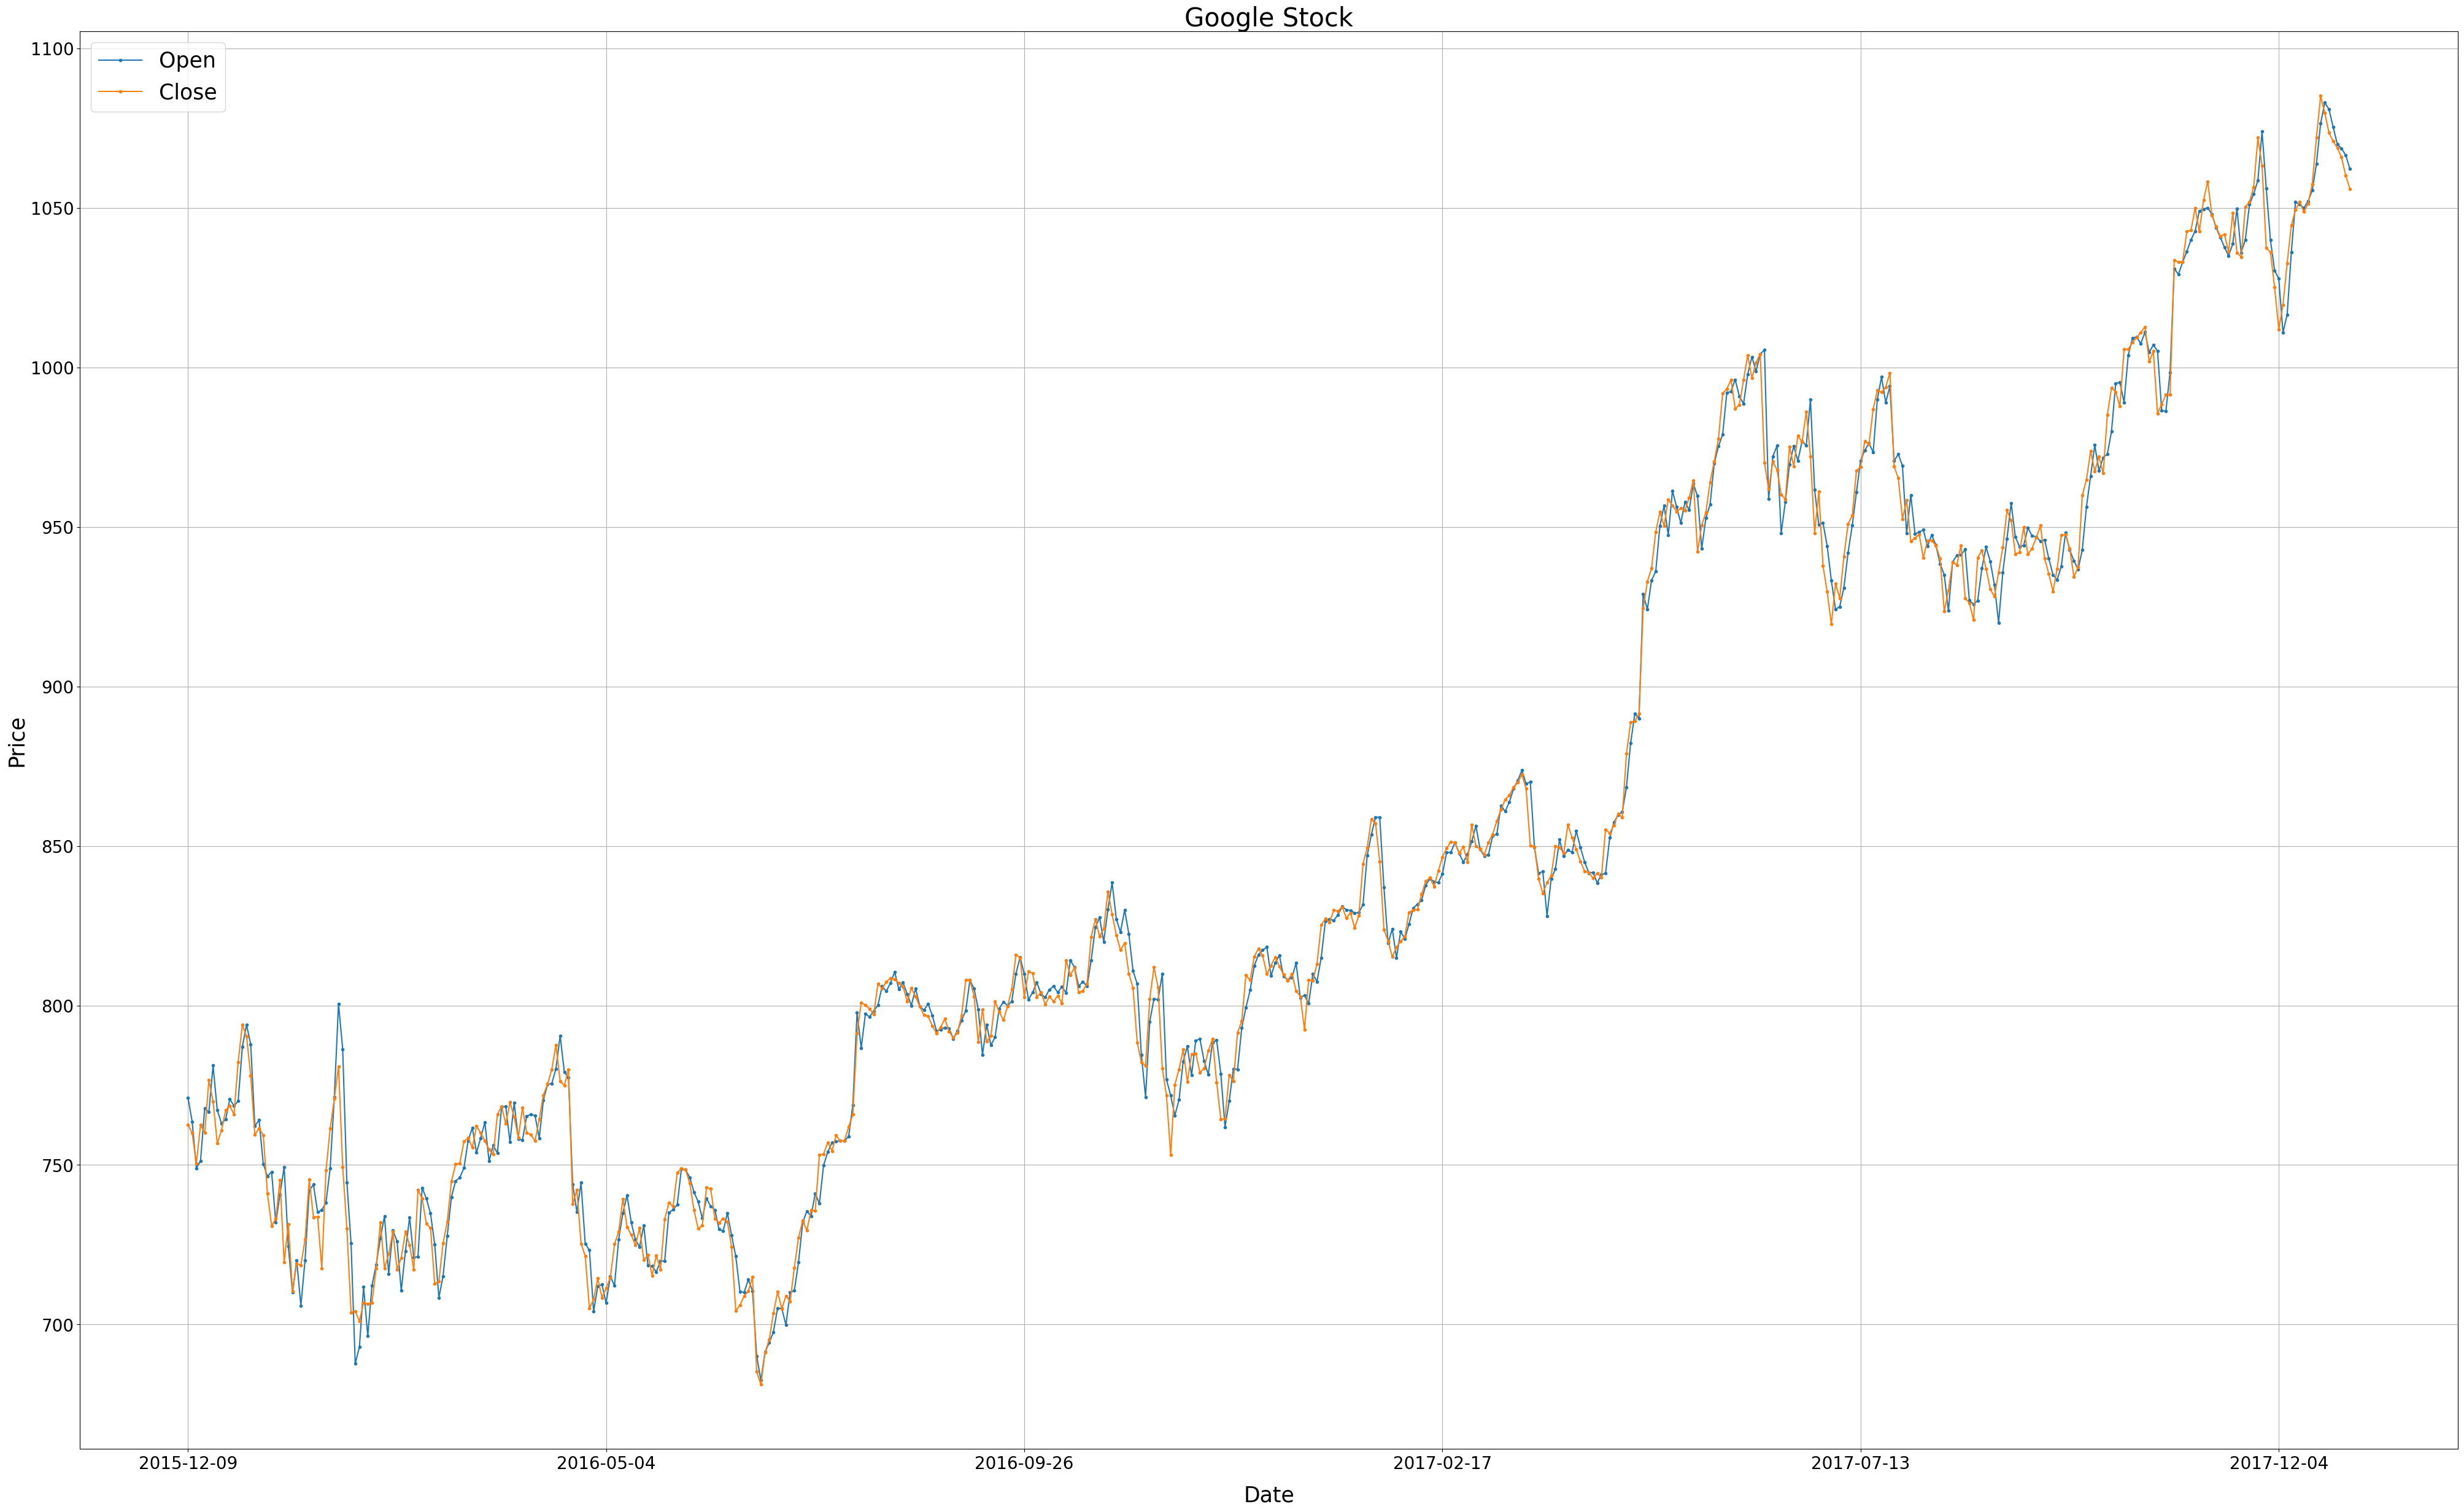

In [ ]:
#Use the white background(default)
plt.style.use('default')

#Create a plot with open and close 

sample_data.plot(y=['Open','Close'], x='Date',title='Google 2015-12-09~2017-12-28',fontsize=20, grid = True, marker = 'o', ms = 3, figsize = (50,30))

#Label x&y axis
plt.xlabel('Date', labelpad=15, fontdict={ 'size': 25})
plt.ylabel('Price',fontdict={ 'size': 25})

#Set the title
plt.title('Google Stock', fontdict={'size':30})

#Set the legend
plt.legend(loc='best', fontsize=25)

The purpose of the plot is to see an overall trend for the volume of the stock data

Text(0.5, 1.0, 'Google')

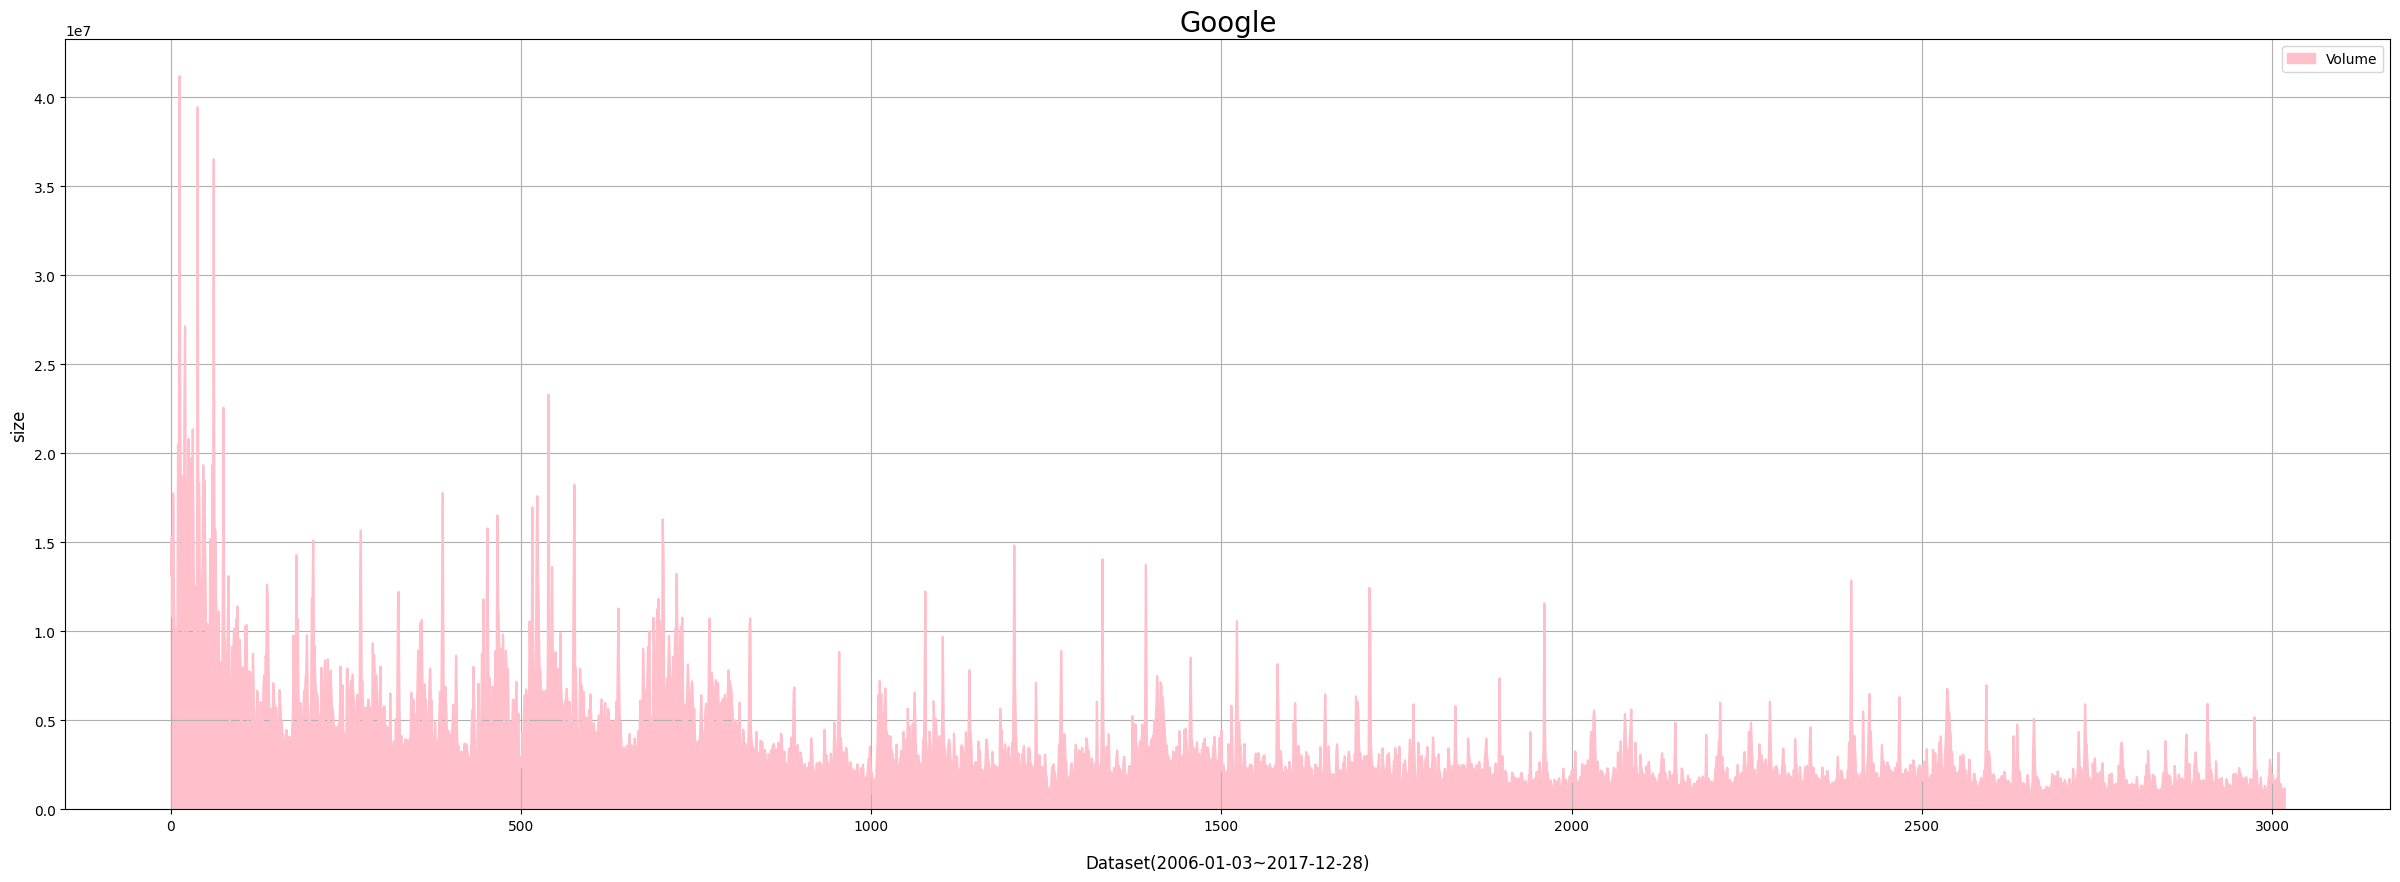

In [ ]:
#Use the white background(default)
plt.style.use('default')

#font dict
font_title1 = { 'color': 'black',
         'weight': 'normal',
         'size': 20}

#Create a plot 
data.plot.area(y=['Volume'], grid = True, figsize = (30,10), color='pink')
plt.xlabel('Dataset(2006-01-03~2017-12-28)', labelpad=15, fontdict={ 'size': 12})
plt.ylabel('size',fontdict={ 'size': 12})
plt.title('Google', fontdict=font_title1)



The purpose of the plot is to see the median, possible outliers of the data.

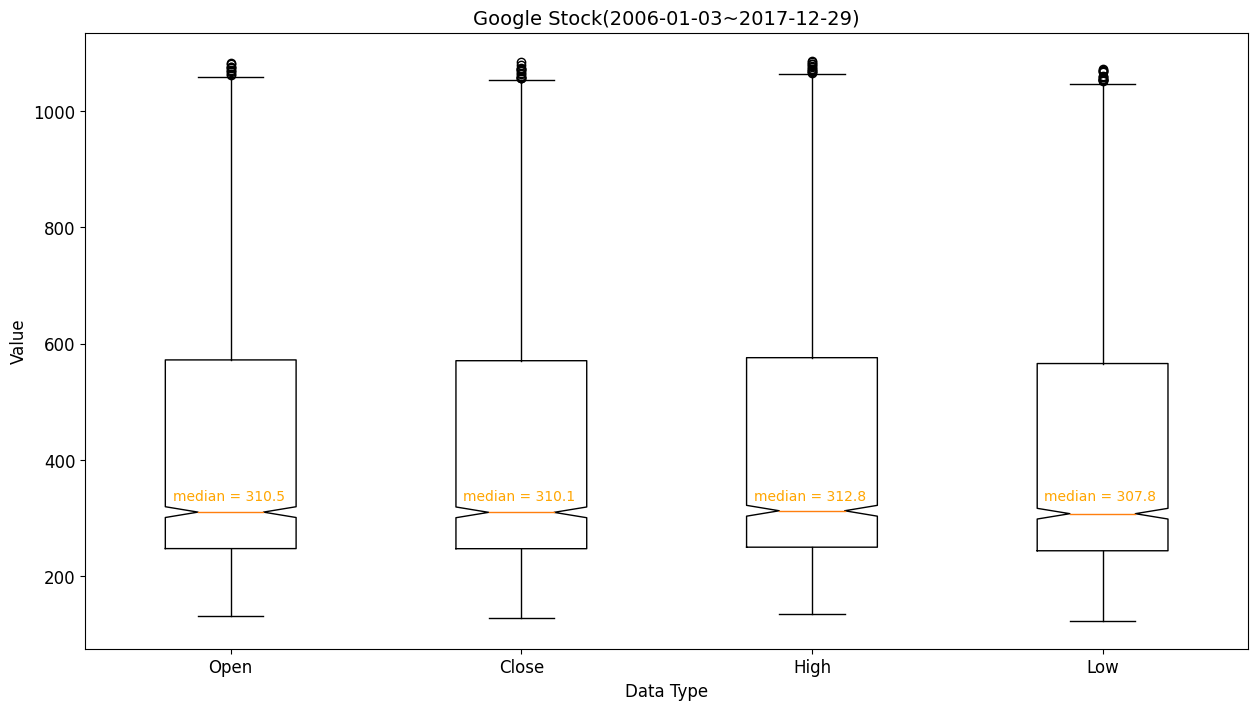

possible outliers for Open
 [1073.99 1063.78 1076.45 1083.02 1080.92 1075.39 1070.   1068.64 1066.6
 1062.25]
possible outliers for Close
 [1058.29 1056.52 1072.01 1063.29 1057.47 1072.   1085.09 1079.78 1073.56
 1070.85 1068.86 1065.85 1060.2  1055.95]
possible outliers for High
 [1073.04 1080.   1067.08 1075.25 1086.49 1084.98 1081.24 1077.52 1071.72
 1068.86 1068.27 1064.84]
possible outliers for Low
 [1051.92 1054.77 1054.54 1053.6  1060.09 1070.37 1072.27 1068.6  1069.
 1067.64 1058.64 1058.38 1053.38 1052.7 ]


In [ ]:
#Use the white background
plt.style.use('default')

#Regulate the size
plt.rcParams['figure.figsize'] = (15, 8)

#Regulate the font size
plt.rcParams['font.size'] = 12

#abstract and save it into data_x
data_a = data['Open']
data_b = data['Close']
data_c = data['High']
data_d = data['Low']

#font dict
font_text = {
         'color': 'orange',
         'weight': 'normal',
         'size': 'small'
         }
fig, ax = plt.subplots()

#create a box plot with open,close,high,low 
box = ax.boxplot([data_a, data_b, data_c,data_d], notch=True)

#Label x-axis
ax.set_xlabel('Data Type')

#Label y-axis
ax.set_ylabel('Value')

#Add the texts on the plot
plt.text(0.8, 330, 'median = 310.5',fontdict=font_text)
plt.text(1.8, 330, 'median = 310.1',fontdict=font_text)
plt.text(2.8, 330, 'median = 312.8',fontdict=font_text)
plt.text(3.8, 330, 'median = 307.8',fontdict=font_text)

#Set the title
plt.title('Google Stock(2006-01-03~2017-12-29)', fontdict={'size':14})

#abstract medians
medians = [item.get_ydata() for item in box['medians']]
#abstract fliers(outliers)
fliers = [item.get_ydata() for item in box['fliers']]

#Label x 
ax.set_xticklabels(['Open', 'Close', 'High','Low'])

#Show the plot
plt.show()

#show outliers for each column
print("possible outliers for Open\n",fliers[0])
print("possible outliers for Close\n",fliers[1])
print("possible outliers for High\n",fliers[2])
print("possible outliers for Low\n",fliers[3])

The purpose of the plot is to see how many times open prices surpass close prices

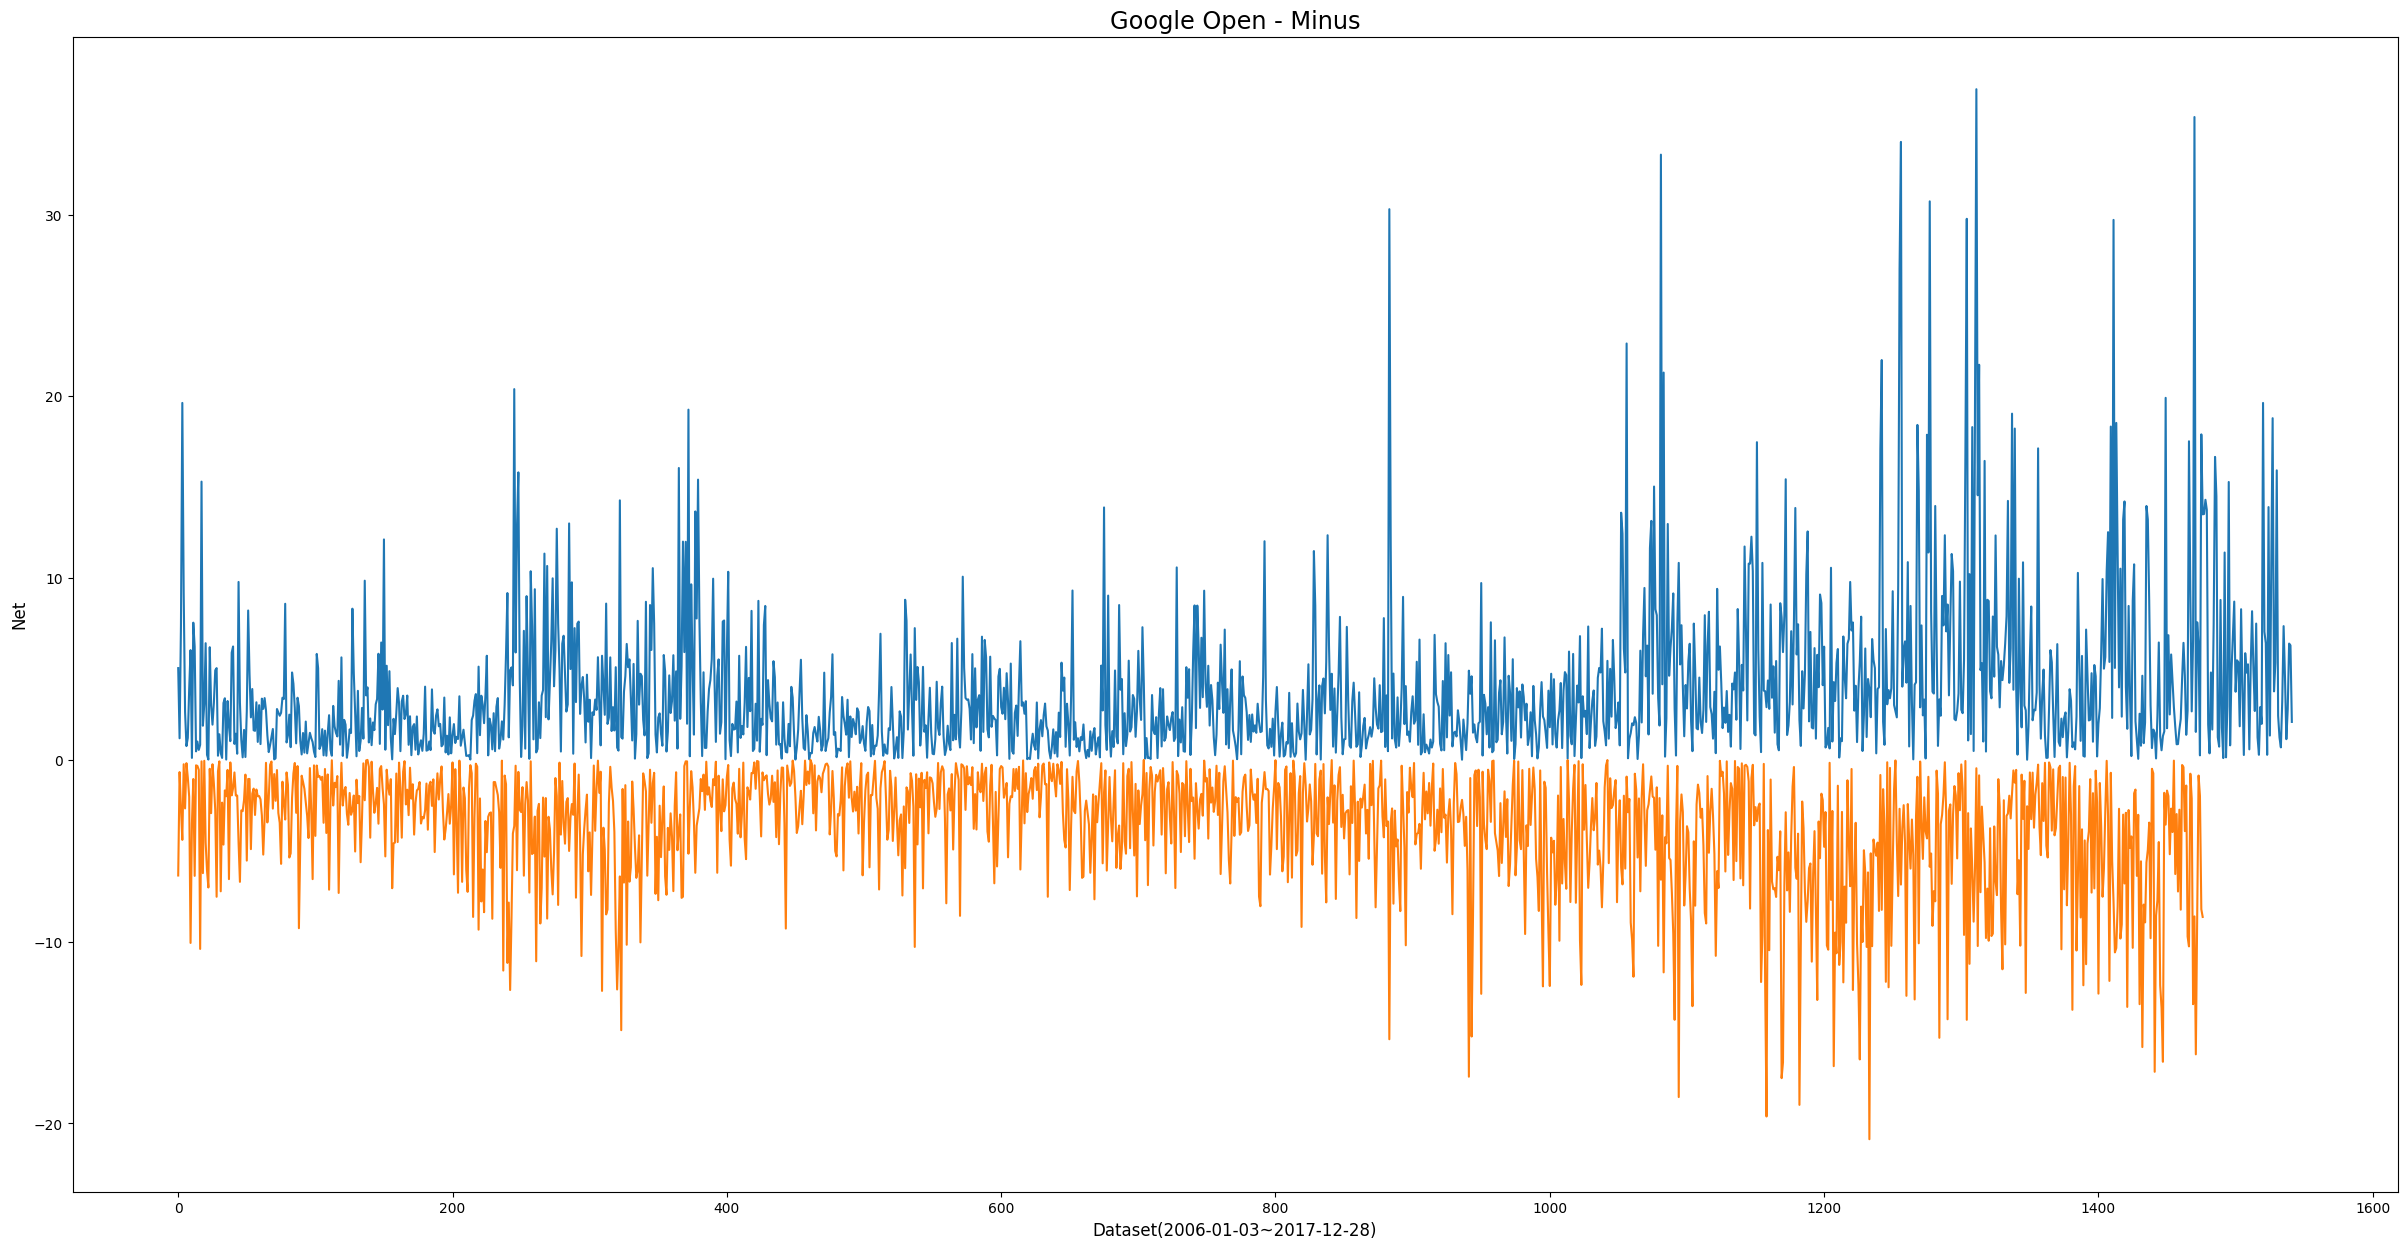

In [ ]:
#open-data=a
a = data['Open']-data['Close']

#Regulate the size of the plot
plt.figure(figsize=(30,15))

#Empty lists
plus = []
minus = []

#font dict
font1 = {
         'color': 'black',
         'weight': 'normal',
         'size': 'xx-large'
         }
#font dict 
font2 = { 'color': 'black',
         'weight': 'normal',
         'size': 12}

#Label x-axis and y-axix
plt.xlabel('Dataset(2006-01-03~2017-12-28)', fontdict=font2)
plt.ylabel('Net', fontdict=font2)

#Set the title
plt.title('Google Open - Close', fontdict=font1)

#Looping elements in a
for i in a:
  #If the element in a is greater than 0
  if i>0:
    #go to a plus list
    plus.append(i)
  else:
    #If not, go to a minus list
    minus.append(i)

#Create a plot
plt.plot(plus)
plt.plot(minus)


# Data Prediction

*Predict the price of the stock using the ARIMA module*

In [ ]:
#Google TimeSeries
Google = data
Google

Date     Open     High      Low    Close    Volume   Name
0     2006-01-03   211.47   218.05   209.32   217.83  13137450  GOOGL
1     2006-01-04   222.17   224.70   220.09   222.84  15292353  GOOGL
2     2006-01-05   223.22   226.00   220.97   225.85  10815661  GOOGL
3     2006-01-06   228.66   235.49   226.85   233.06  17759521  GOOGL
4     2006-01-09   233.44   236.94   230.70   233.68  12795837  GOOGL
...          ...      ...      ...      ...      ...       ...    ...
3014  2017-12-22  1070.00  1071.72  1067.64  1068.86    889446  GOOGL
3015  2017-12-26  1068.64  1068.86  1058.64  1065.85    918767  GOOGL
3016  2017-12-27  1066.60  1068.27  1058.38  1060.20   1116203  GOOGL
3017  2017-12-28  1062.25  1064.84  1053.38  1055.95    994249  GOOGL
3018  2017-12-29  1055.49  1058.05  1052.70  1053.40   1180340  GOOGL

[3019 rows x 7 columns]

In [ ]:
#Amazon TimeSeries
Amazon = pd.read_csv('/content/drive/MyDrive/AMZN_2006-01-01_to_2018-01-01.csv')
Amazon

Date     Open     High      Low    Close   Volume  Name
0     2006-01-03    47.47    47.85    46.25    47.58  7582127  AMZN
1     2006-01-04    47.48    47.73    46.69    47.25  7440914  AMZN
2     2006-01-05    47.16    48.20    47.11    47.65  5417258  AMZN
3     2006-01-06    47.97    48.58    47.32    47.87  6154285  AMZN
4     2006-01-09    46.55    47.10    46.40    47.08  8945056  AMZN
...          ...      ...      ...      ...      ...      ...   ...
3014  2017-12-22  1172.08  1174.62  1167.83  1168.36  1585054  AMZN
3015  2017-12-26  1168.36  1178.32  1160.55  1176.76  2005187  AMZN
3016  2017-12-27  1179.91  1187.29  1175.61  1182.26  1867208  AMZN
3017  2017-12-28  1189.00  1190.10  1184.38  1186.10  1841676  AMZN
3018  2017-12-29  1182.35  1184.00  1167.50  1169.47  2688391  AMZN

[3019 rows x 7 columns]

# Google (50)

In [ ]:
data_50 = Google[50:100]
data_50

Date    Open    High     Low   Close    Volume   Name
50  2006-03-16  174.48  174.55  169.12  170.28  10021478  GOOGL
51  2006-03-17  169.57  171.06  167.63  208.40   8558663  GOOGL
52  2006-03-20  171.34  175.22  170.94  204.20  10415814  GOOGL
53  2006-03-21  175.18  176.01  169.71  204.68   9858099  GOOGL
54  2006-03-22  170.04  172.22  168.92  213.79   7600389  GOOGL
55  2006-03-23  171.35  173.05  170.27  210.23   7784834  GOOGL
56  2006-03-24  184.49  185.23  181.44  220.47  15182162  GOOGL
57  2006-03-27  183.73  186.04  182.68  197.69   7026402  GOOGL
58  2006-03-28  186.04  189.12  185.77  199.65   8952532  GOOGL
59  2006-03-29  190.16  199.70  189.94  218.77  19345086  GOOGL
60  2006-03-30  194.79  196.95  192.00  203.28  14723626  GOOGL
61  2006-03-31  194.56  196.13  192.21  185.03  36514857  GOOGL
62  2006-04-03  194.96  196.43  194.16  207.71   8129930  GOOGL
63  2006-04-04  195.14  202.65  194.26  170.13  15725137  GOOGL
64  2006-04-05  204.31  207.49  201.61  194.41  13454976  GOOGL
65  2006-04-06  203.45  207.15  202.92  205.03   8599983  GOOGL
66  2006-04-07  206.41  206.63  202.21  195.19   7027980  GOOGL
67  2006-04-10  203.74  208.79  202.83  197.57   9325308  GOOGL
68  2006-04-11  208.42  209.76  203.31  170.06  11112419  GOOGL
69  2006-04-12  204.70  205.87  202.80  202.32   6021169  GOOGL
70  2006-04-13  204.52  205.08  200.45  209.18   6554861  GOOGL
71  2006-04-17  201.93  206.46  200.62  188.79   8261422  GOOGL
72  2006-04-18  204.17  205.12  200.95  205.80   8154780  GOOGL
73  2006-04-19  206.49  207.03  203.57  171.12   6786151  GOOGL
74  2006-04-20  205.71  208.21  204.30  205.46  12458412  GOOGL
75  2006-04-21  224.67  225.59  218.30  174.27  22559250  GOOGL
76  2006-04-24  219.92  222.57  218.48  195.04   8840100  GOOGL
77  2006-04-25  220.03  220.74  213.21  202.37   9569567  GOOGL
78  2006-04-26  214.08  215.24  211.98  169.55   7282287  GOOGL
79  2006-04-27  211.67  213.67  209.90  201.28   8359256  GOOGL
80  2006-04-28  209.52  213.08  208.36  203.61   7425666  GOOGL
81  2006-05-01  209.44  209.93  199.47  197.60  10367637  GOOGL
82  2006-05-02  200.74  201.45  194.39  183.08  13108333  GOOGL
83  2006-05-03  198.37  200.95  195.64  197.28   8075850  GOOGL
84  2006-05-04  197.71  199.63  196.30  213.20   4653255  GOOGL
85  2006-05-05  199.00  200.54  196.09  197.35   6069528  GOOGL
86  2006-05-08  197.75  198.76  195.22  197.59   5129461  GOOGL
87  2006-05-09  198.04  204.70  197.07  204.60   9143664  GOOGL
88  2006-05-10  204.36  206.06  201.13  201.69   6211308  GOOGL
89  2006-05-11  201.91  202.56  192.68  193.69   8898884  GOOGL
90  2006-05-12  191.96  192.63  186.96  187.25  10156524  GOOGL
91  2006-05-15  188.15  190.27  184.31  188.29   8594484  GOOGL
92  2006-05-16  188.18  188.62  185.13  185.84   5317198  GOOGL
93  2006-05-17  185.49  190.11  185.30  187.44  10664908  GOOGL
94  2006-05-18  189.58  191.10  185.54  185.68   5835892  GOOGL
95  2006-05-19  186.83  187.44  180.47  185.20  11399560  GOOGL
96  2006-05-22  184.11  186.70  182.81  185.66   8605568  GOOGL
97  2006-05-23  187.29  192.13  186.97  187.98   8985421  GOOGL
98  2006-05-24  188.86  191.91  185.99  190.82   9556510  GOOGL
99  2006-05-25  189.73  191.69  186.34  191.69   8198046  GOOGL

In [ ]:
#Set train_data and test_data 
train_data, test_data = data_50[0:int(len(data_50)*0.7)], data_50[int(len(data_50)*0.7):]

#Set training_data as train_data['Close']
training_data = train_data['Close'].values

#Shuffle it
traning_data = np.random.shuffle(training_data)

#Set test_data as test_data['Close]
test_data = test_data['Close'].values

#looping elements in training_data
history = [x for x in training_data]

#Empty list
model_predictions = []

#Save len(test_data)
N_test_observations = len(test_data)

#Looping as much as N_test_observations
for time_point in range(N_test_observations):

  #Call the ARIMA
    model = ARIMA(history, order=(4,1,0))
  
    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

  #append the value into model_predictions
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

#Print MSE_error
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 818.3639976597365


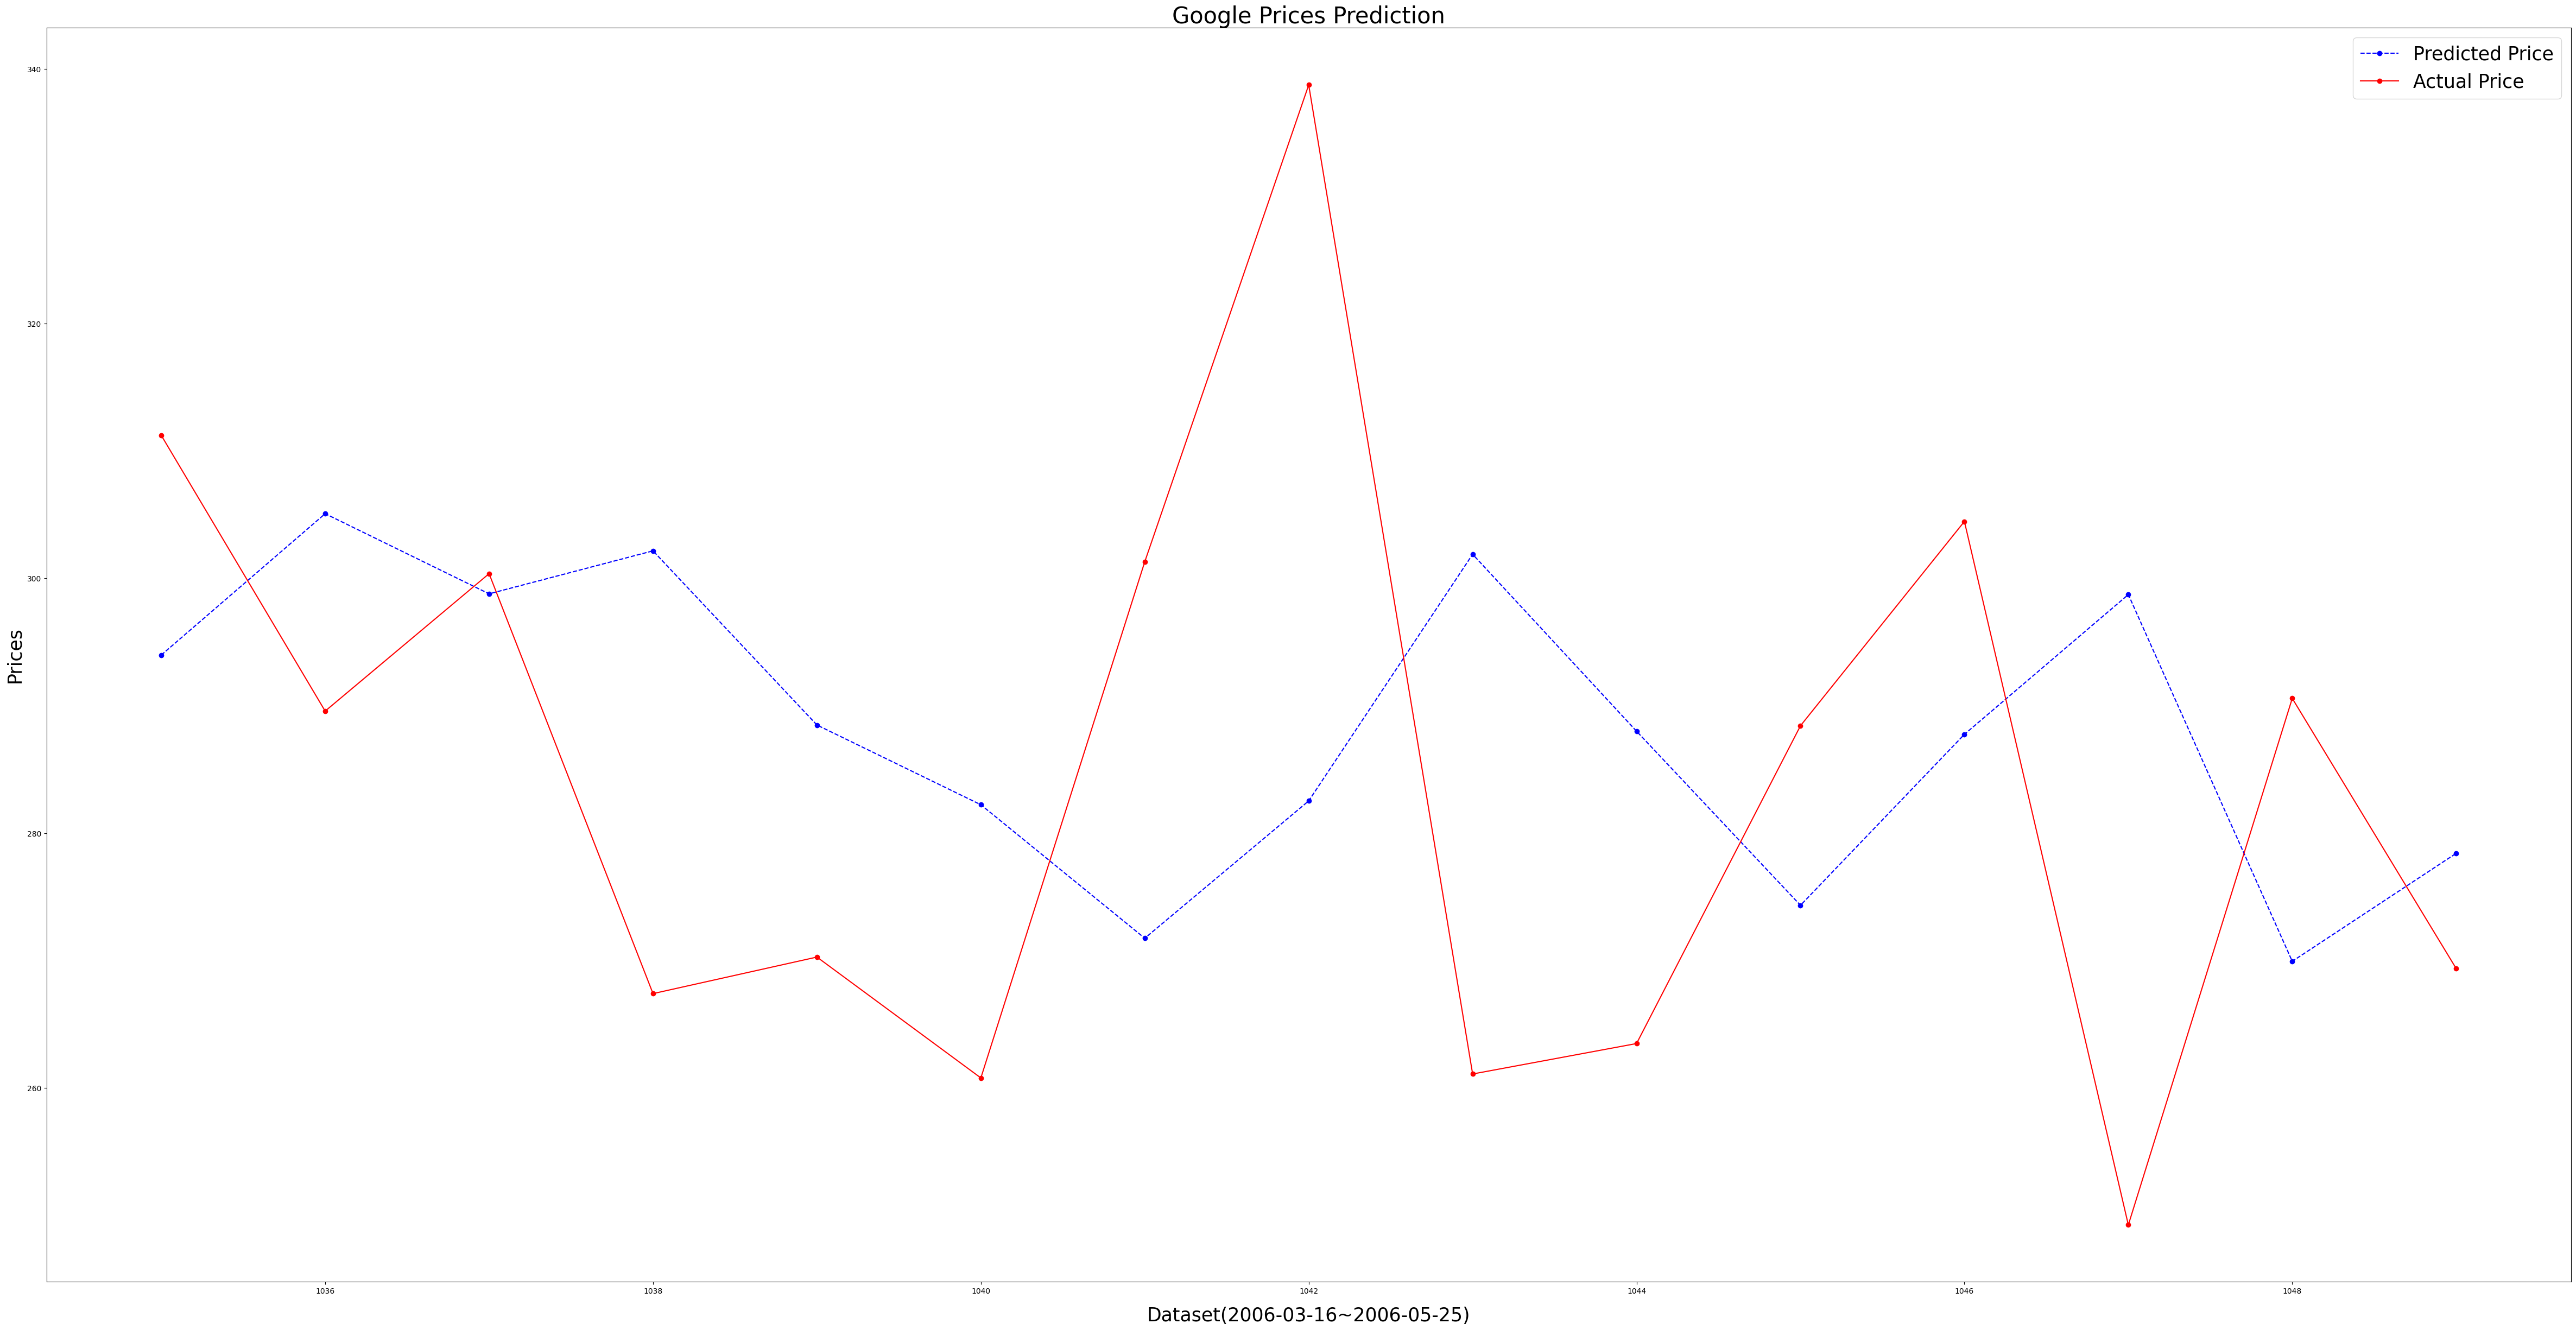

The accuracy of the prediction data is 54.743104437698776%


In [ ]:
#Index range
test_set_range = data_50[int(len(data_50)*0.7):].index

#Use the white background
plt.style.use('default')

#Regulate the size
plt.figure(figsize=(60,30))

#Plot the predicted price with blue
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
#Plot the actual price with red
plt.plot(test_set_range, test_data, color='red', marker='o', label='Actual Price')

#Set the title
plt.title('Google Prices Prediction', fontdict ={'size':30})

#Label x&y axis
plt.xlabel('Dataset(2006-03-16~2006-05-25)', labelpad=15, fontdict={'size':25})
plt.ylabel('Prices', fontdict={'size':25})

#show what the line is
plt.legend(loc='best', fontsize=25)

#show the plot
plt.show()

#Set net_accuracy =0
net_accuracy = 0

#Looping as the length of test_data
for i in range (0,len(test_data)):
  #If predicted price is greater than the actucal price
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    #net_accuracy = net_accuracy + accuracy
    net_accuracy += accuracy

  #If predicted price is less than the actucal price
  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])

     #net_accuracy = net_accuracy + accuracy
     net_accuracy += accuracy

#Divide net_accuracy by length of the test_data
net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")

# Google (500)

In [ ]:
data_500 = Google[1000:1500]
data_500

Date    Open    High     Low   Close   Volume   Name
1000  2009-12-22  300.97  301.05  299.72  308.31  1884290  GOOGL
1001  2009-12-23  302.05  306.74  301.73  241.43  2075311  GOOGL
1002  2009-12-24  306.77  310.07  306.44  303.80   858620  GOOGL
1003  2009-12-28  311.14  313.31  309.55  308.11  1698015  GOOGL
1004  2009-12-29  312.68  312.73  309.45  259.39  1427712  GOOGL
...          ...     ...     ...     ...     ...      ...    ...
1495  2011-12-09  309.31  314.88  308.81  281.35  2768503  GOOGL
1496  2011-12-12  311.25  313.40  310.46  262.69  2185234  GOOGL
1497  2011-12-13  314.69  318.60  311.74  304.03  4028638  GOOGL
1498  2011-12-14  311.24  312.47  306.55  307.14  3904882  GOOGL
1499  2011-12-15  311.57  312.31  309.65  309.16  2409785  GOOGL

[500 rows x 7 columns]

In [ ]:
train_data, test_data = data_500[0:int(len(data_500)*0.7)], data_500[int(len(data_500)*0.7):]

training_data = train_data['Close'].values

traning_data = np.random.shuffle(training_data)

test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1113.9567824077762


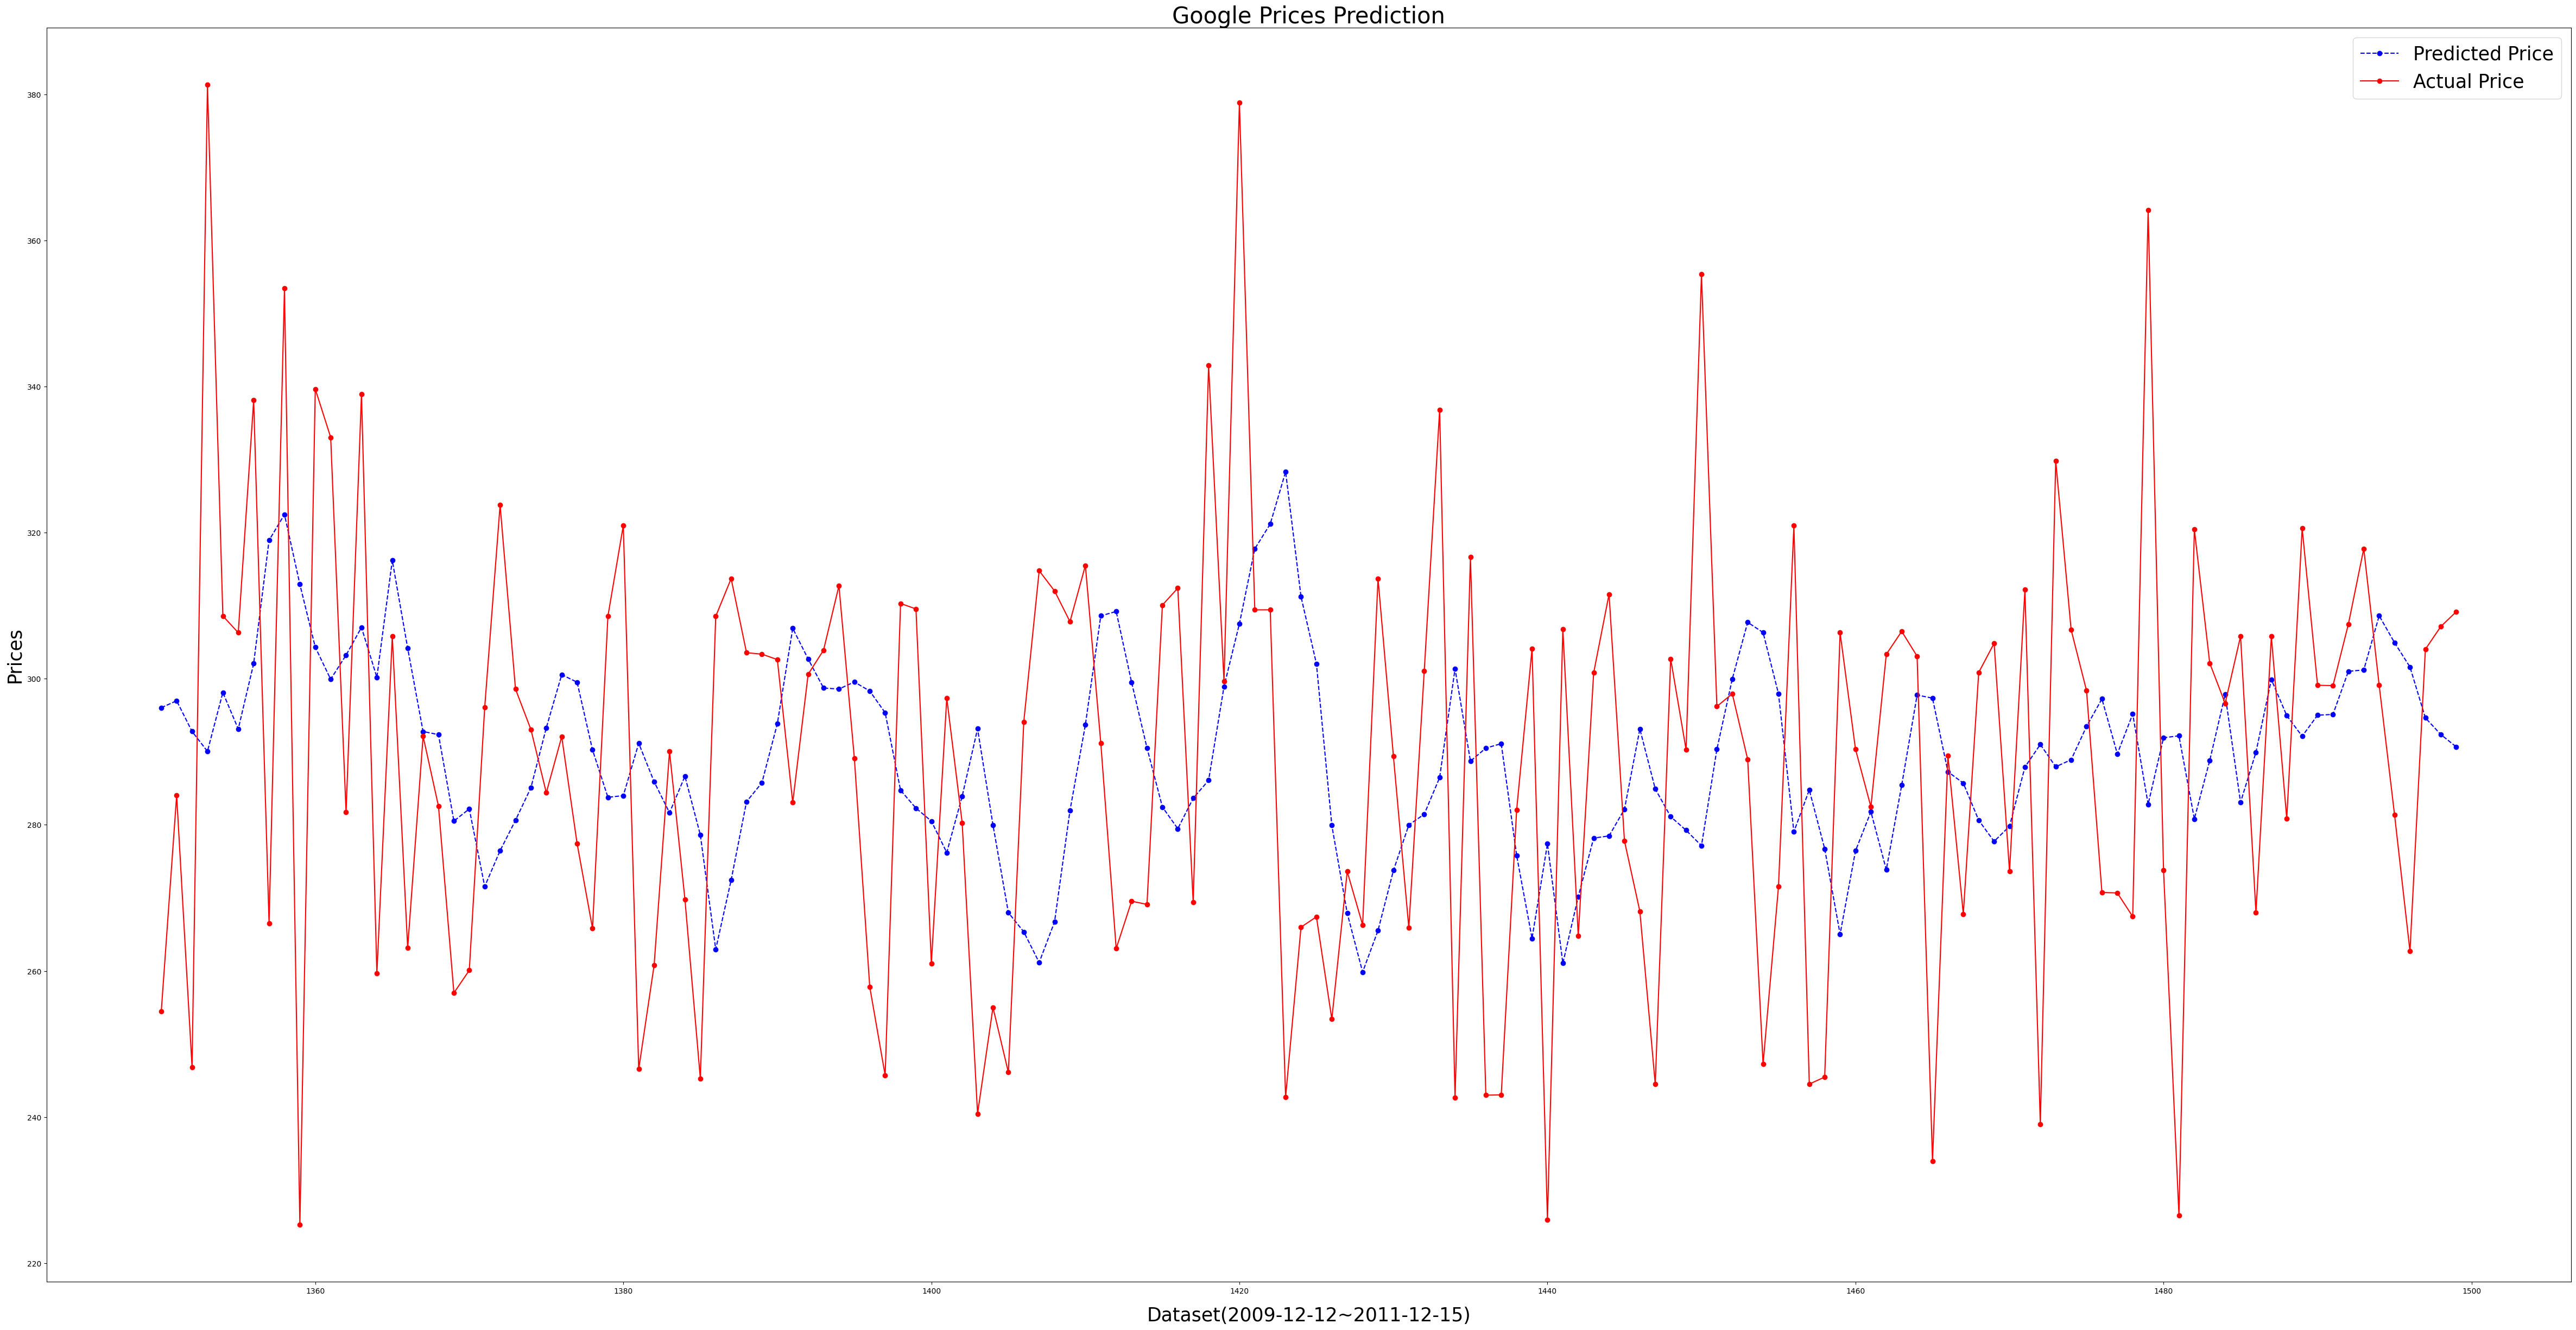

The accuracy of the prediction data is 75.29703101252647%


In [ ]:
test_set_range = data_500[int(len(data_500)*0.7):].index
plt.style.use('default')

font1 = {
         'color': 'black',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.figure(figsize=(60,30))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', marker='o', label='Actual Price')
plt.title('Google Prices Prediction', fontdict ={'size':30})
plt.xlabel('Dataset(2009-12-12~2011-12-15)', labelpad=15, fontdict ={'size':25})
plt.ylabel('Prices',fontdict ={'size':25})
plt.legend(loc='best', fontsize=25)
plt.show()

net_accuracy = 0

for i in range (0,len(test_data)):
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    net_accuracy += accuracy

  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])
     net_accuracy += accuracy

net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")

# Google (All)

In [ ]:
train_data, test_data = data[0:int(len(data)*0.7)], data[int(len(data)*0.7):]

training_data = train_data['Close'].values

test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 178.5254186616697


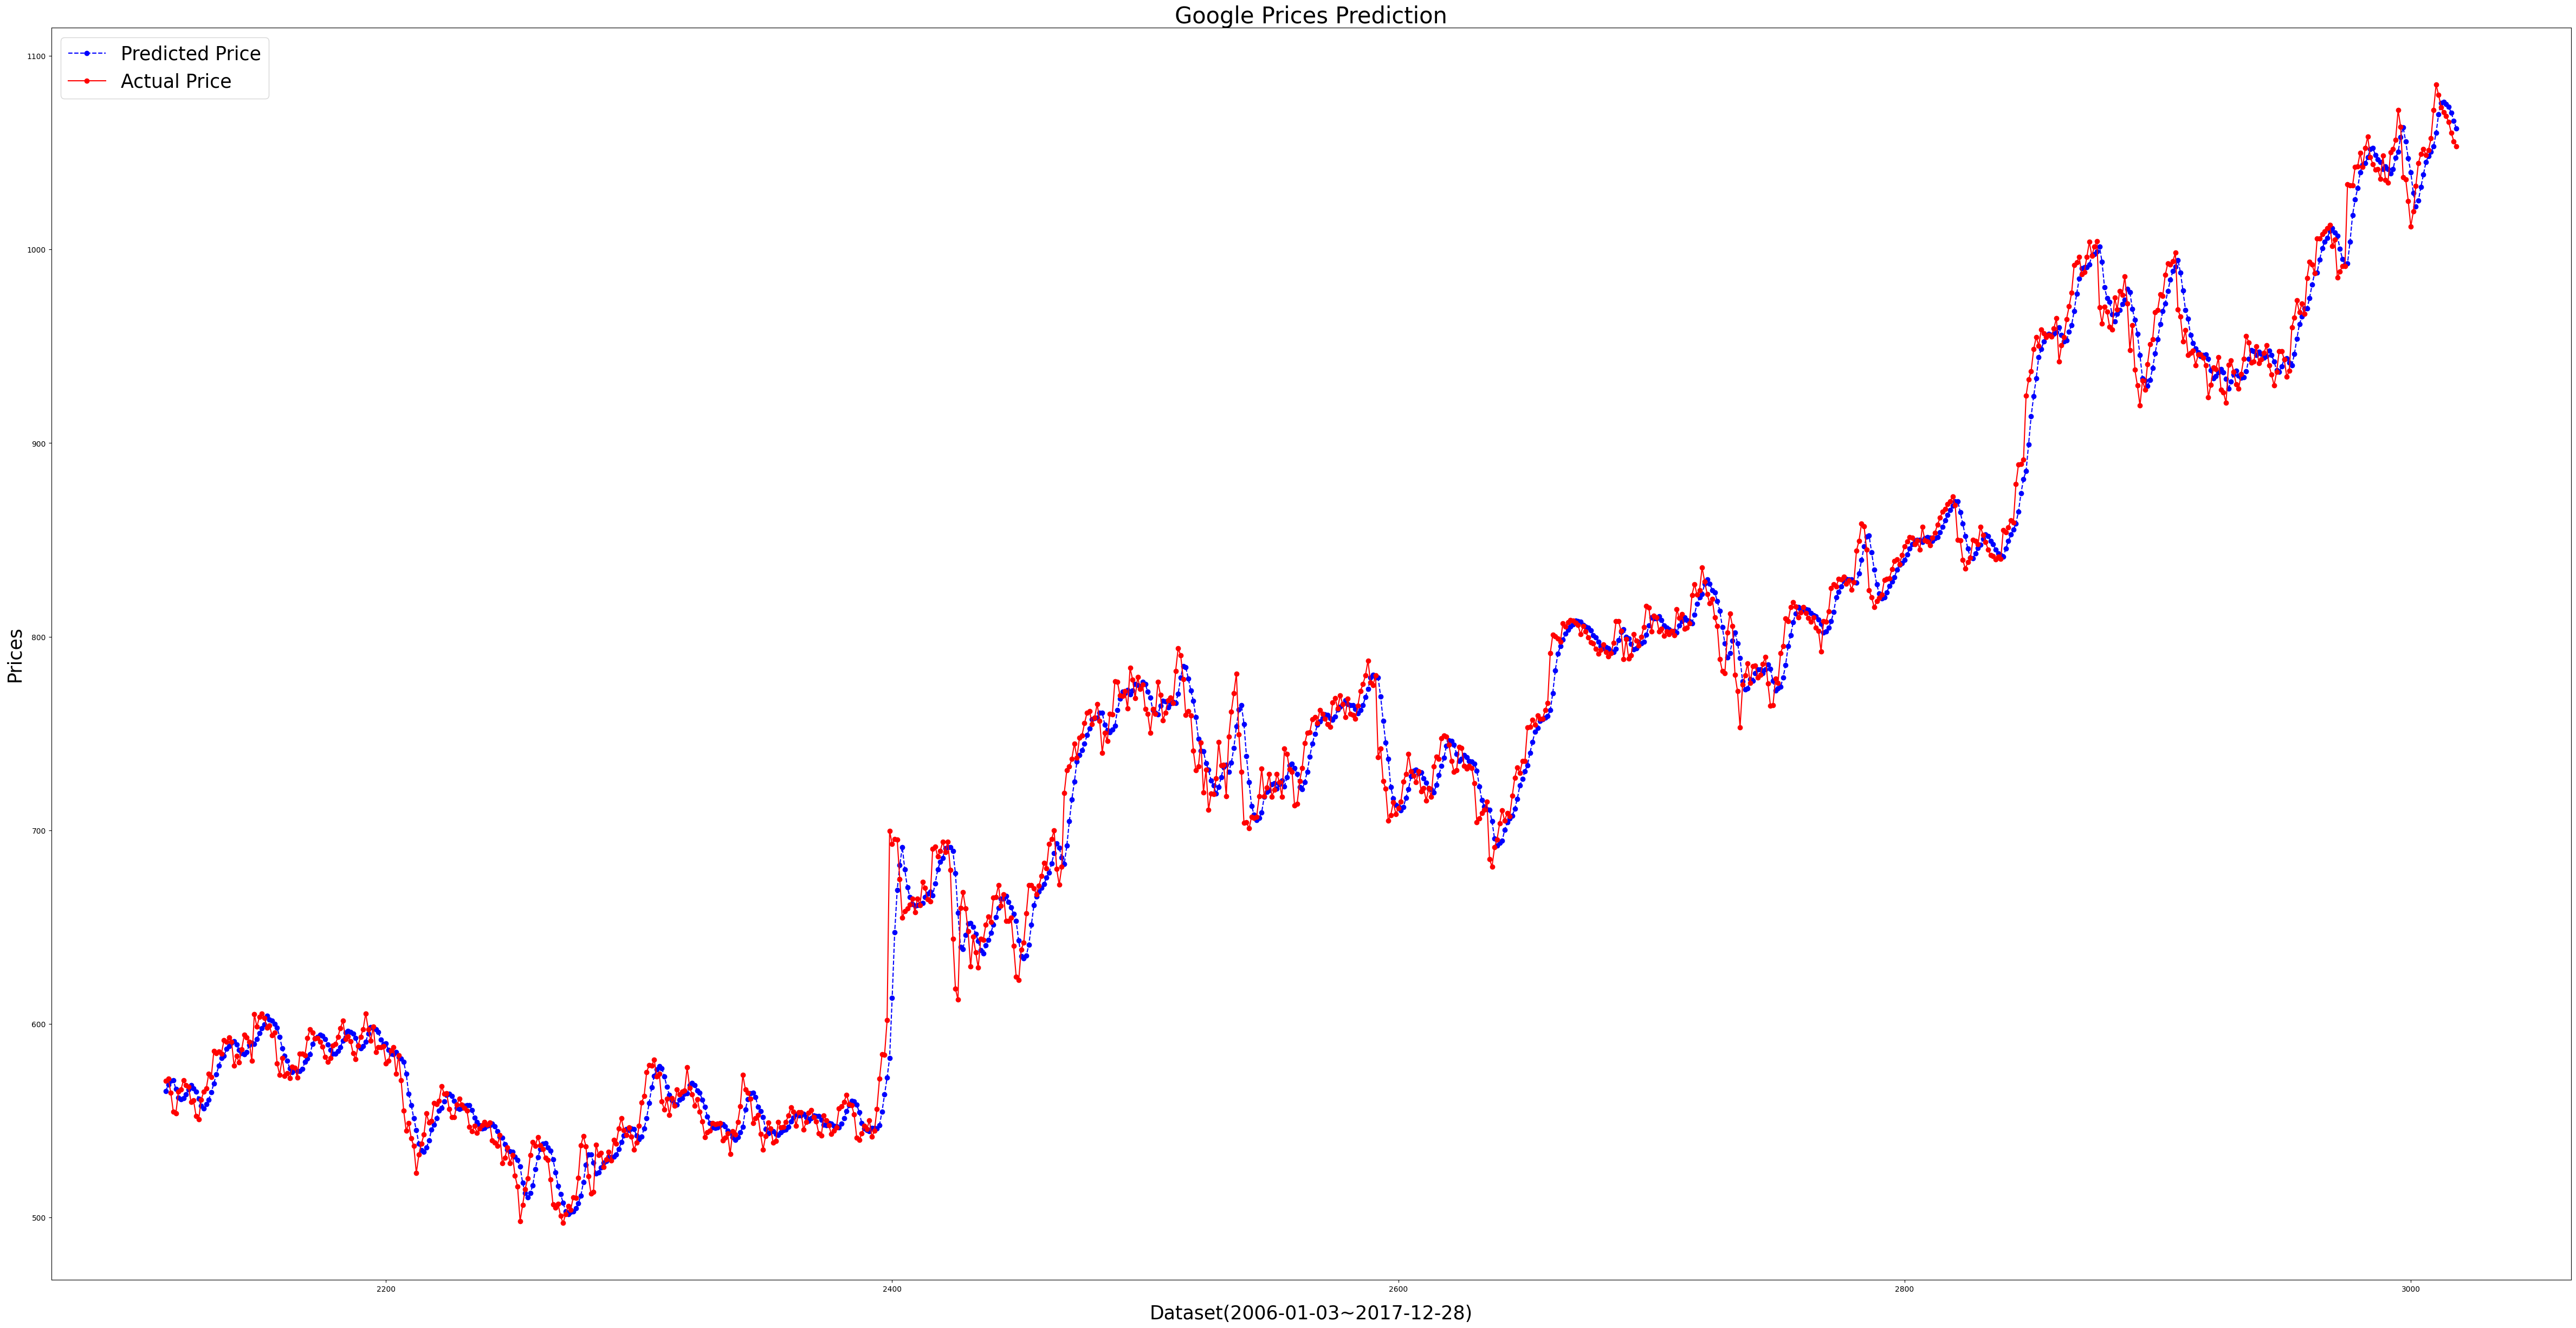

In [ ]:
test_set_range = Google[int(len(Google)*0.7):].index
plt.style.use('default')

font1 = {
         'color': 'black',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.figure(figsize=(60,30))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', marker='o', label='Actual Price')
plt.title('Google Prices Prediction', fontdict ={'size':30})
plt.xlabel('Dataset(2006-01-03~2017-12-28)', labelpad=15, fontdict={'size':25})
plt.ylabel('Prices',{'size':25})
plt.legend(loc='best', fontsize=25)
plt.show()

net_accuracy = 0

In [ ]:
for i in range (0,len(test_data)):
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    net_accuracy += accuracy

  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])
     net_accuracy += accuracy

net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")

The accuracy of the prediction data is 98.65141833924204%


# Amazon (50)

In [ ]:
Amazon_50 = Amazon[1000:1050]
Amazon_50

Date    Open    High     Low   Close    Volume  Name
1000  2009-12-22  133.76  135.99  132.65   56.04   8257493  AMZN
1001  2009-12-23  134.80  139.05  134.35   80.11   9550603  AMZN
1002  2009-12-24  139.20  139.70  137.54   95.22   5128777  AMZN
1003  2009-12-28  139.75  141.98  138.53  139.35   8769639  AMZN
1004  2009-12-29  141.29  142.58  138.55   37.87   8405872  AMZN
1005  2009-12-30  138.40  138.40  135.28   84.19   6917416  AMZN
1006  2009-12-31  137.09  137.28  134.52  141.17   4524192  AMZN
1007  2010-01-04  136.25  136.61  133.14   73.33   7600543  AMZN
1008  2010-01-05  133.43  135.48  131.81  126.64   8856456  AMZN
1009  2010-01-06  134.60  134.73  131.65  159.70   7180977  AMZN
1010  2010-01-07  132.01  132.32  128.80   69.76  11030124  AMZN
1011  2010-01-08  130.56  133.68  129.03   74.94   9833829  AMZN
1012  2010-01-11  132.62  132.80  129.21  118.40   8786668  AMZN
1013  2010-01-12  128.99  129.82  126.55  129.66   9098190  AMZN
1014  2010-01-13  127.90  129.71  125.75   77.68  10727856  AMZN
1015  2010-01-14  129.14  130.38  126.40   79.15   9788435  AMZN
1016  2010-01-15  129.18  129.65  127.06   93.36  15382763  AMZN
1017  2010-01-19  126.20  128.00  124.33  130.35   8900116  AMZN
1018  2010-01-20  127.13  129.20  125.08  128.36   9081533  AMZN
1019  2010-01-21  127.26  128.15  125.00  122.12   9976146  AMZN
1020  2010-01-22  125.60  127.67  120.76   83.12  11577818  AMZN
1021  2010-01-25  122.10  122.28  118.12   93.60  12031053  AMZN
1022  2010-01-26  120.56  122.98  119.06   86.49   9567607  AMZN
1023  2010-01-27  121.03  123.33  118.80   87.08  14765273  AMZN
1024  2010-01-28  124.43  127.20  122.80   75.71  27293062  AMZN
1025  2010-01-29  129.77  131.85  124.14   85.32  29478976  AMZN
1026  2010-02-01  123.18  124.86  113.82  113.43  37774317  AMZN
1027  2010-02-02  118.79  118.98  114.40   49.99  23084986  AMZN
1028  2010-02-03  117.12  119.61  116.56   87.56  12409012  AMZN
1029  2010-02-04  118.64  120.33  115.74   75.82  12783912  AMZN
1030  2010-02-05  115.88  117.65  114.10   88.79  11027086  AMZN
1031  2010-02-08  119.38  121.00  116.56   76.30   9898391  AMZN
1032  2010-02-09  118.20  119.09  117.00   73.69   9227158  AMZN
1033  2010-02-10  118.00  118.61  116.00   51.44   6236250  AMZN
1034  2010-02-11  117.21  120.42  116.50   92.64   8344469  AMZN
1035  2010-02-12  118.99  119.94  117.50   42.50   8075533  AMZN
1036  2010-02-16  120.06  120.50  117.18   49.21   8938494  AMZN
1037  2010-02-17  117.08  117.13  115.55   92.11   8947449  AMZN
1038  2010-02-18  115.84  118.51  114.82   64.99   9807497  AMZN
1039  2010-02-19  117.91  119.09  117.00  135.06   7117494  AMZN
1040  2010-02-22  117.37  118.97  116.18   41.19   6809386  AMZN
1041  2010-02-23  118.01  119.25  116.51   81.73   7069011  AMZN
1042  2010-02-24  117.96  119.80  117.15   84.51   7393039  AMZN
1043  2010-02-25  118.17  118.34  115.85   88.67   9535889  AMZN
1044  2010-02-26  117.88  119.43  117.00   73.50   5721864  AMZN
1045  2010-03-01  118.85  124.66  117.53  135.21  13300501  AMZN
1046  2010-03-02  125.01  127.35  124.80  126.56  12098298  AMZN
1047  2010-03-03  125.40  126.94  124.43   62.43   6443021  AMZN
1048  2010-03-04  125.96  128.85  125.57  128.53   7509644  AMZN
1049  2010-03-05  129.13  129.45  127.07   77.37   6771126  AMZN

In [ ]:
train_data, test_data = Amazon_50[0:int(len(Amazon_50)*0.7)], Amazon_50[int(len(Amazon_50)*0.7):]

training_data = train_data['Close'].values

traning_data = np.random.shuffle(training_data)

test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1634.4866860648485


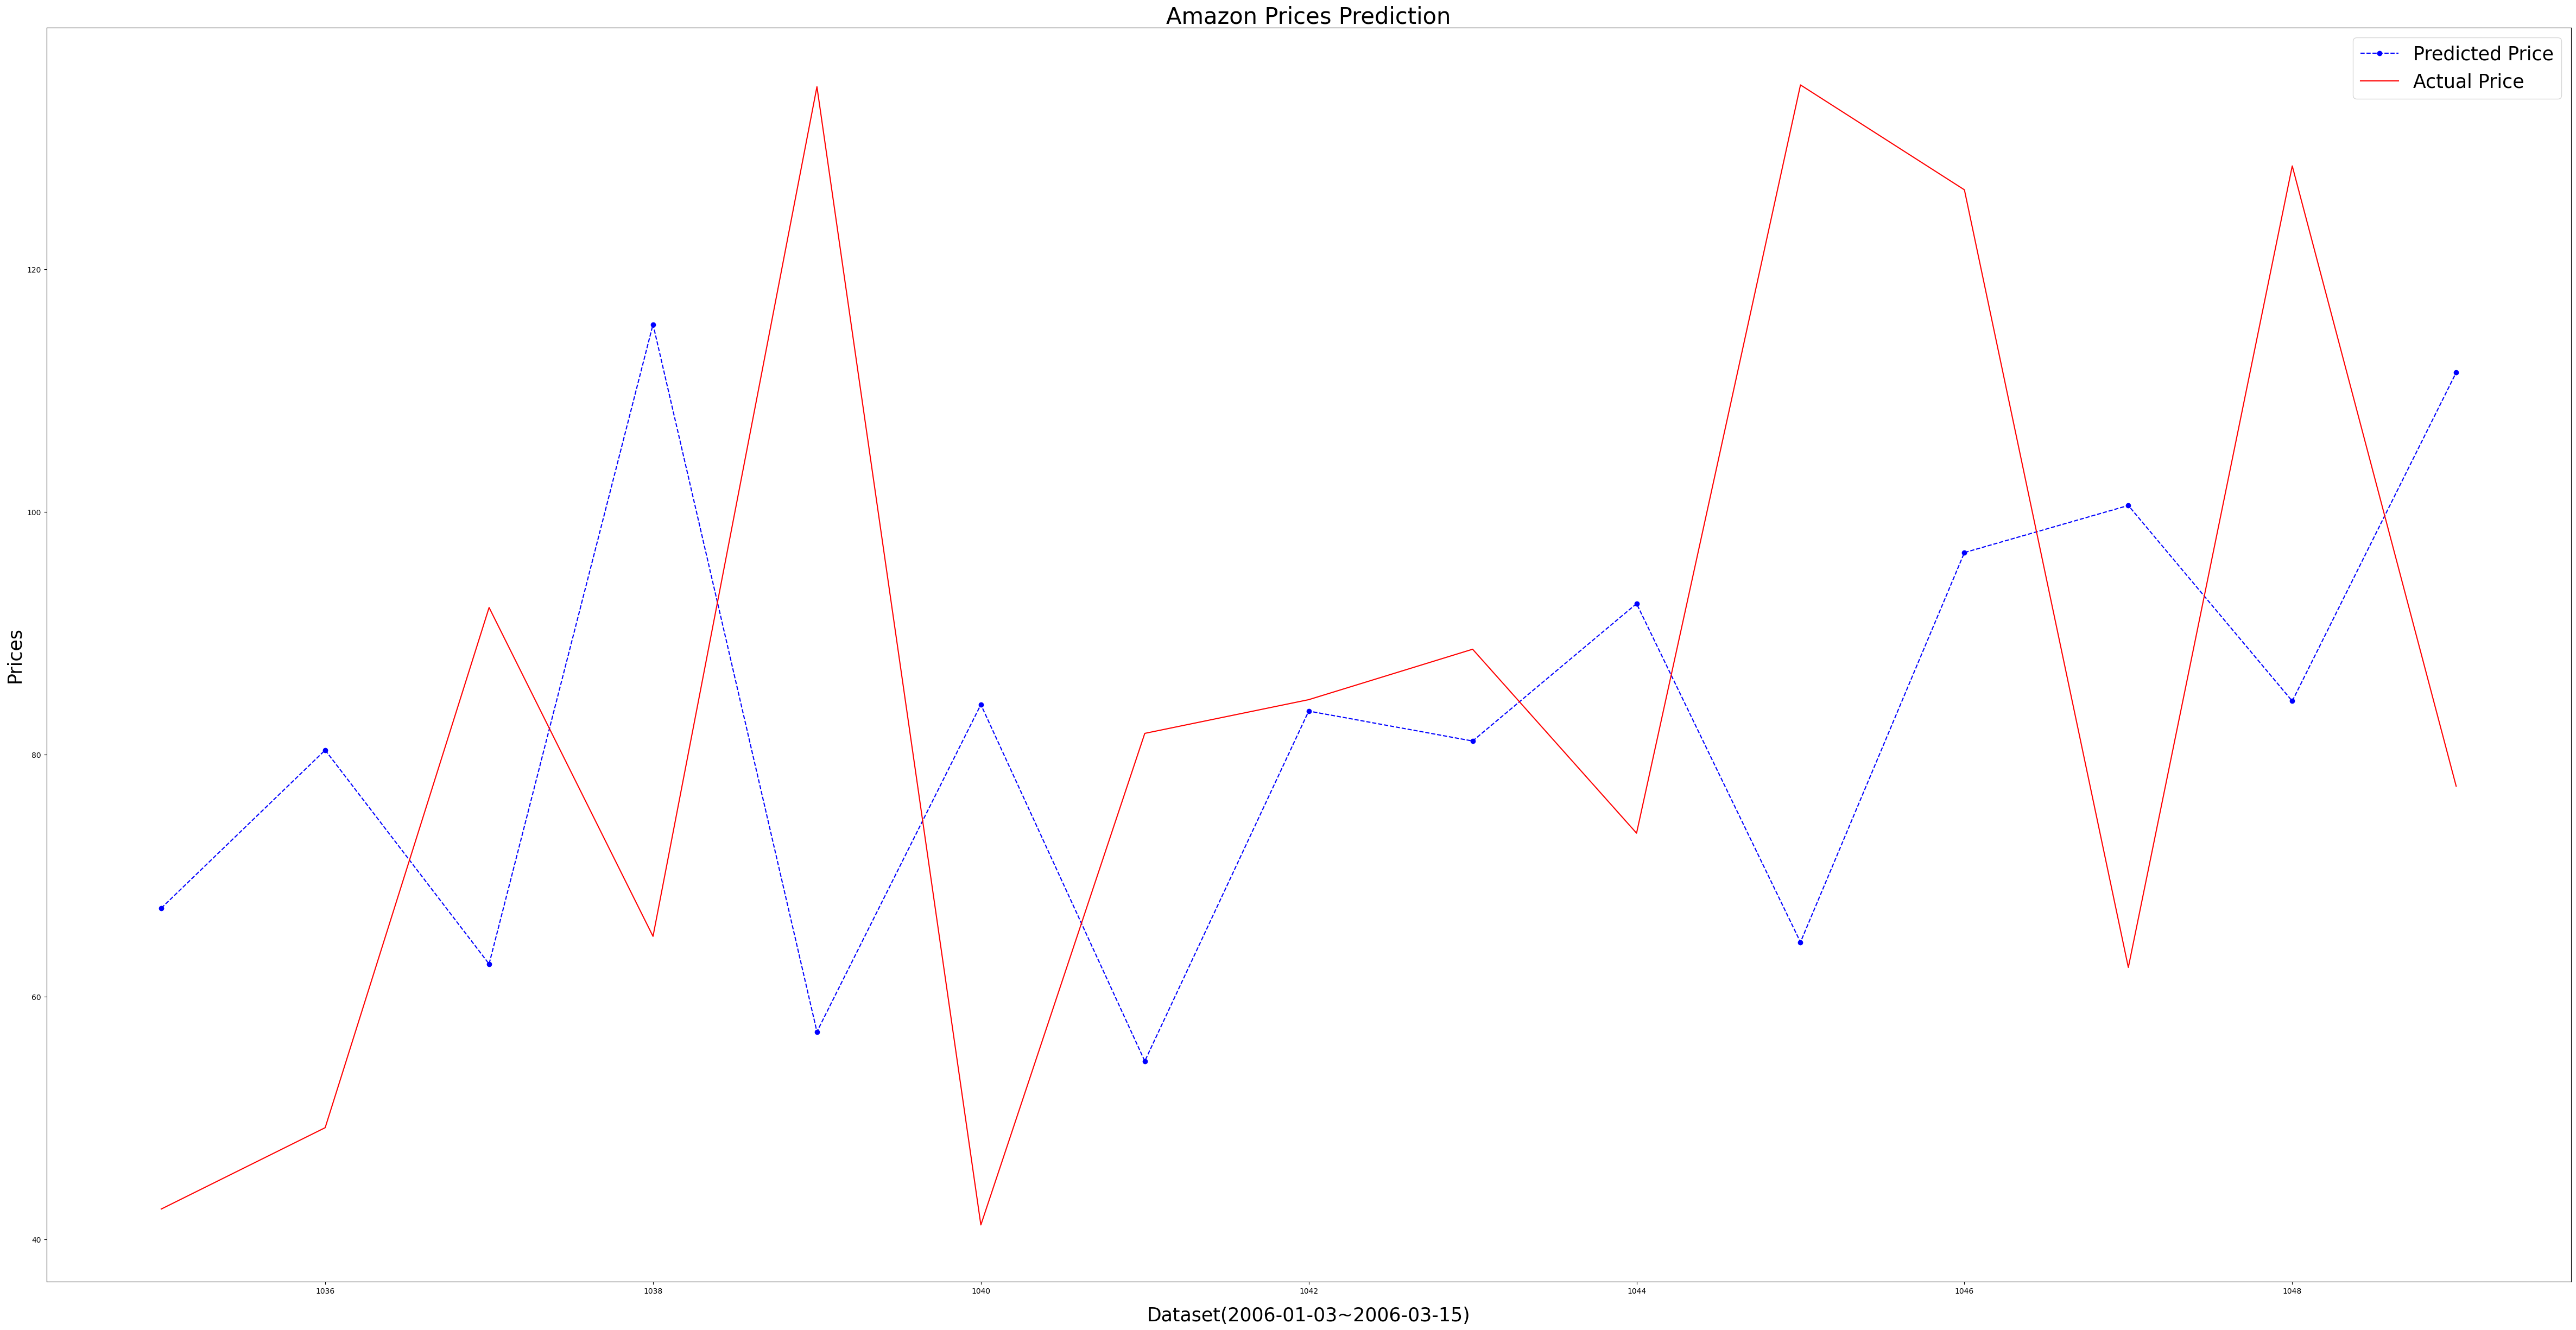

The accuracy of the prediction data is 54.86585128609253%


In [ ]:
test_set_range = Amazon_50[int(len(Amazon_50)*0.7):].index

font1 = {
         'color': 'black',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.figure(figsize=(60,30))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Amazon Prices Prediction', fontdict={'size':30})
plt.xlabel('Dataset(2006-01-03~2006-03-15)', labelpad=15, fontdict={ 'size': 25})
plt.ylabel('Prices',fontdict={ 'size': 25})
plt.legend(loc='best', fontsize=25)
plt.show()

net_accuracy = 0

for i in range (0,len(test_data)):
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    net_accuracy += accuracy

  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])
     net_accuracy += accuracy

net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")

# Amazon (500)

In [ ]:
Amazon_500 = Amazon[500:1000]
Amazon_500

Date    Open    High     Low   Close    Volume  Name
500  2007-12-28   95.27   95.90   92.10  145.45   7587601  AMZN
501  2007-12-31   93.81   94.37   92.45   79.19   5756991  AMZN
502  2008-01-02   95.35   97.43   94.70   81.29  13866390  AMZN
503  2008-01-03   96.06   97.25   94.52   94.68   9122767  AMZN
504  2008-01-04   93.26   93.40   88.50   76.12  10271464  AMZN
..          ...     ...     ...     ...     ...       ...   ...
995  2009-12-15  130.76  132.46  129.59   73.44   7434131  AMZN
996  2009-12-16  130.93  131.45  127.65  134.87  10261207  AMZN
997  2009-12-17  129.36  130.08  126.90   63.96   8482959  AMZN
998  2009-12-18  127.91  128.79  125.65   83.55   9605358  AMZN
999  2009-12-21  130.48  133.20  130.19  124.86   9480258  AMZN

[500 rows x 7 columns]

In [ ]:
train_data, test_data = Amazon_500[0:int(len(Amazon_500)*0.7)], Amazon_500[int(len(Amazon_500)*0.7):]

training_data = train_data['Close'].values

traning_data = np.random.shuffle(training_data)

test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1006.6206697691422


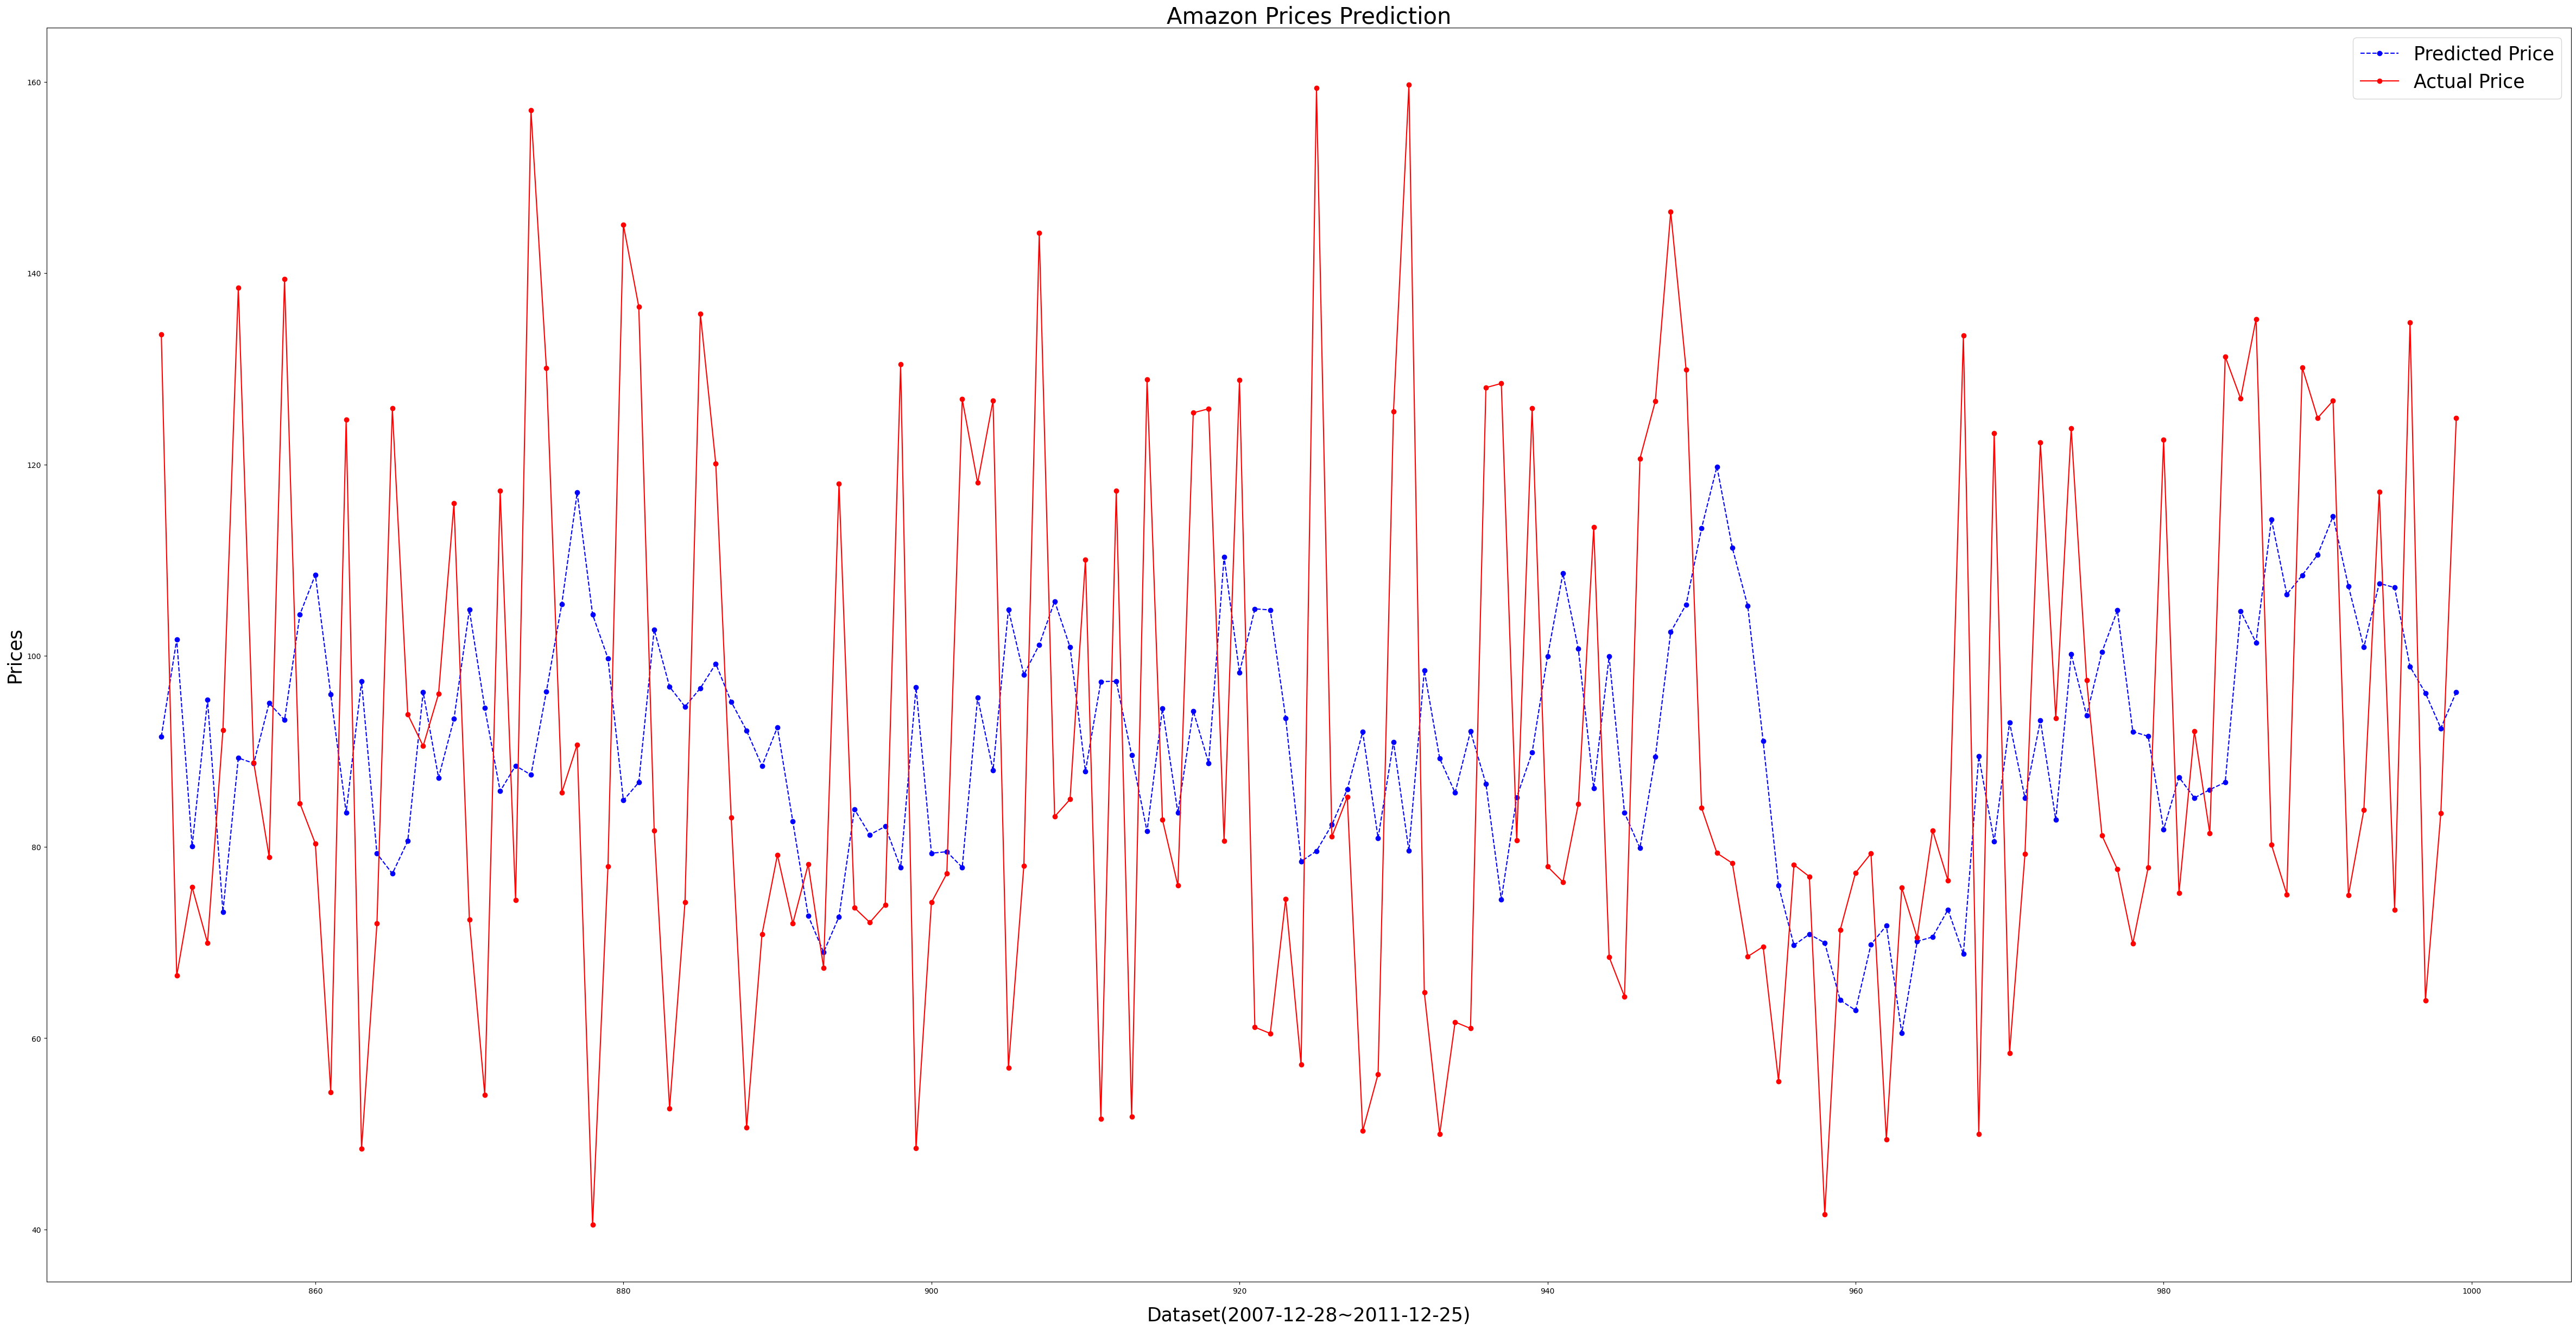

The accuracy of the prediction data is 67.9201803636624%


In [ ]:
test_set_range = Amazon_500[int(len(Amazon_500)*0.7):].index
plt.style.use('default')


plt.figure(figsize=(60,30))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', marker='o', label='Actual Price')
plt.title('Amazon Prices Prediction', fontdict={'size':30})
plt.xlabel('Dataset(2007-12-28~2011-12-25)', labelpad=15, fontdict={ 'size': 25})
plt.ylabel('Prices',fontdict={ 'size': 25})
plt.legend(loc='best', fontsize=25)
plt.show()

#Set the legend
net_accuracy = 0

for i in range (0,len(test_data)):
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    net_accuracy += accuracy

  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])
     net_accuracy += accuracy

net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")

# Amazon (All)

In [ ]:
train_data, test_data = Amazon[0:int(len(Amazon)*0.7)], Amazon[int(len(Amazon)*0.7):]

training_data = train_data['Close'].values

traning_data = np.random.shuffle(training_data)

test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []

N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))

    model_fit = model.fit(disp=0)

    output = model_fit.forecast()

    yhat = output[0]

    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 311.56531463982066


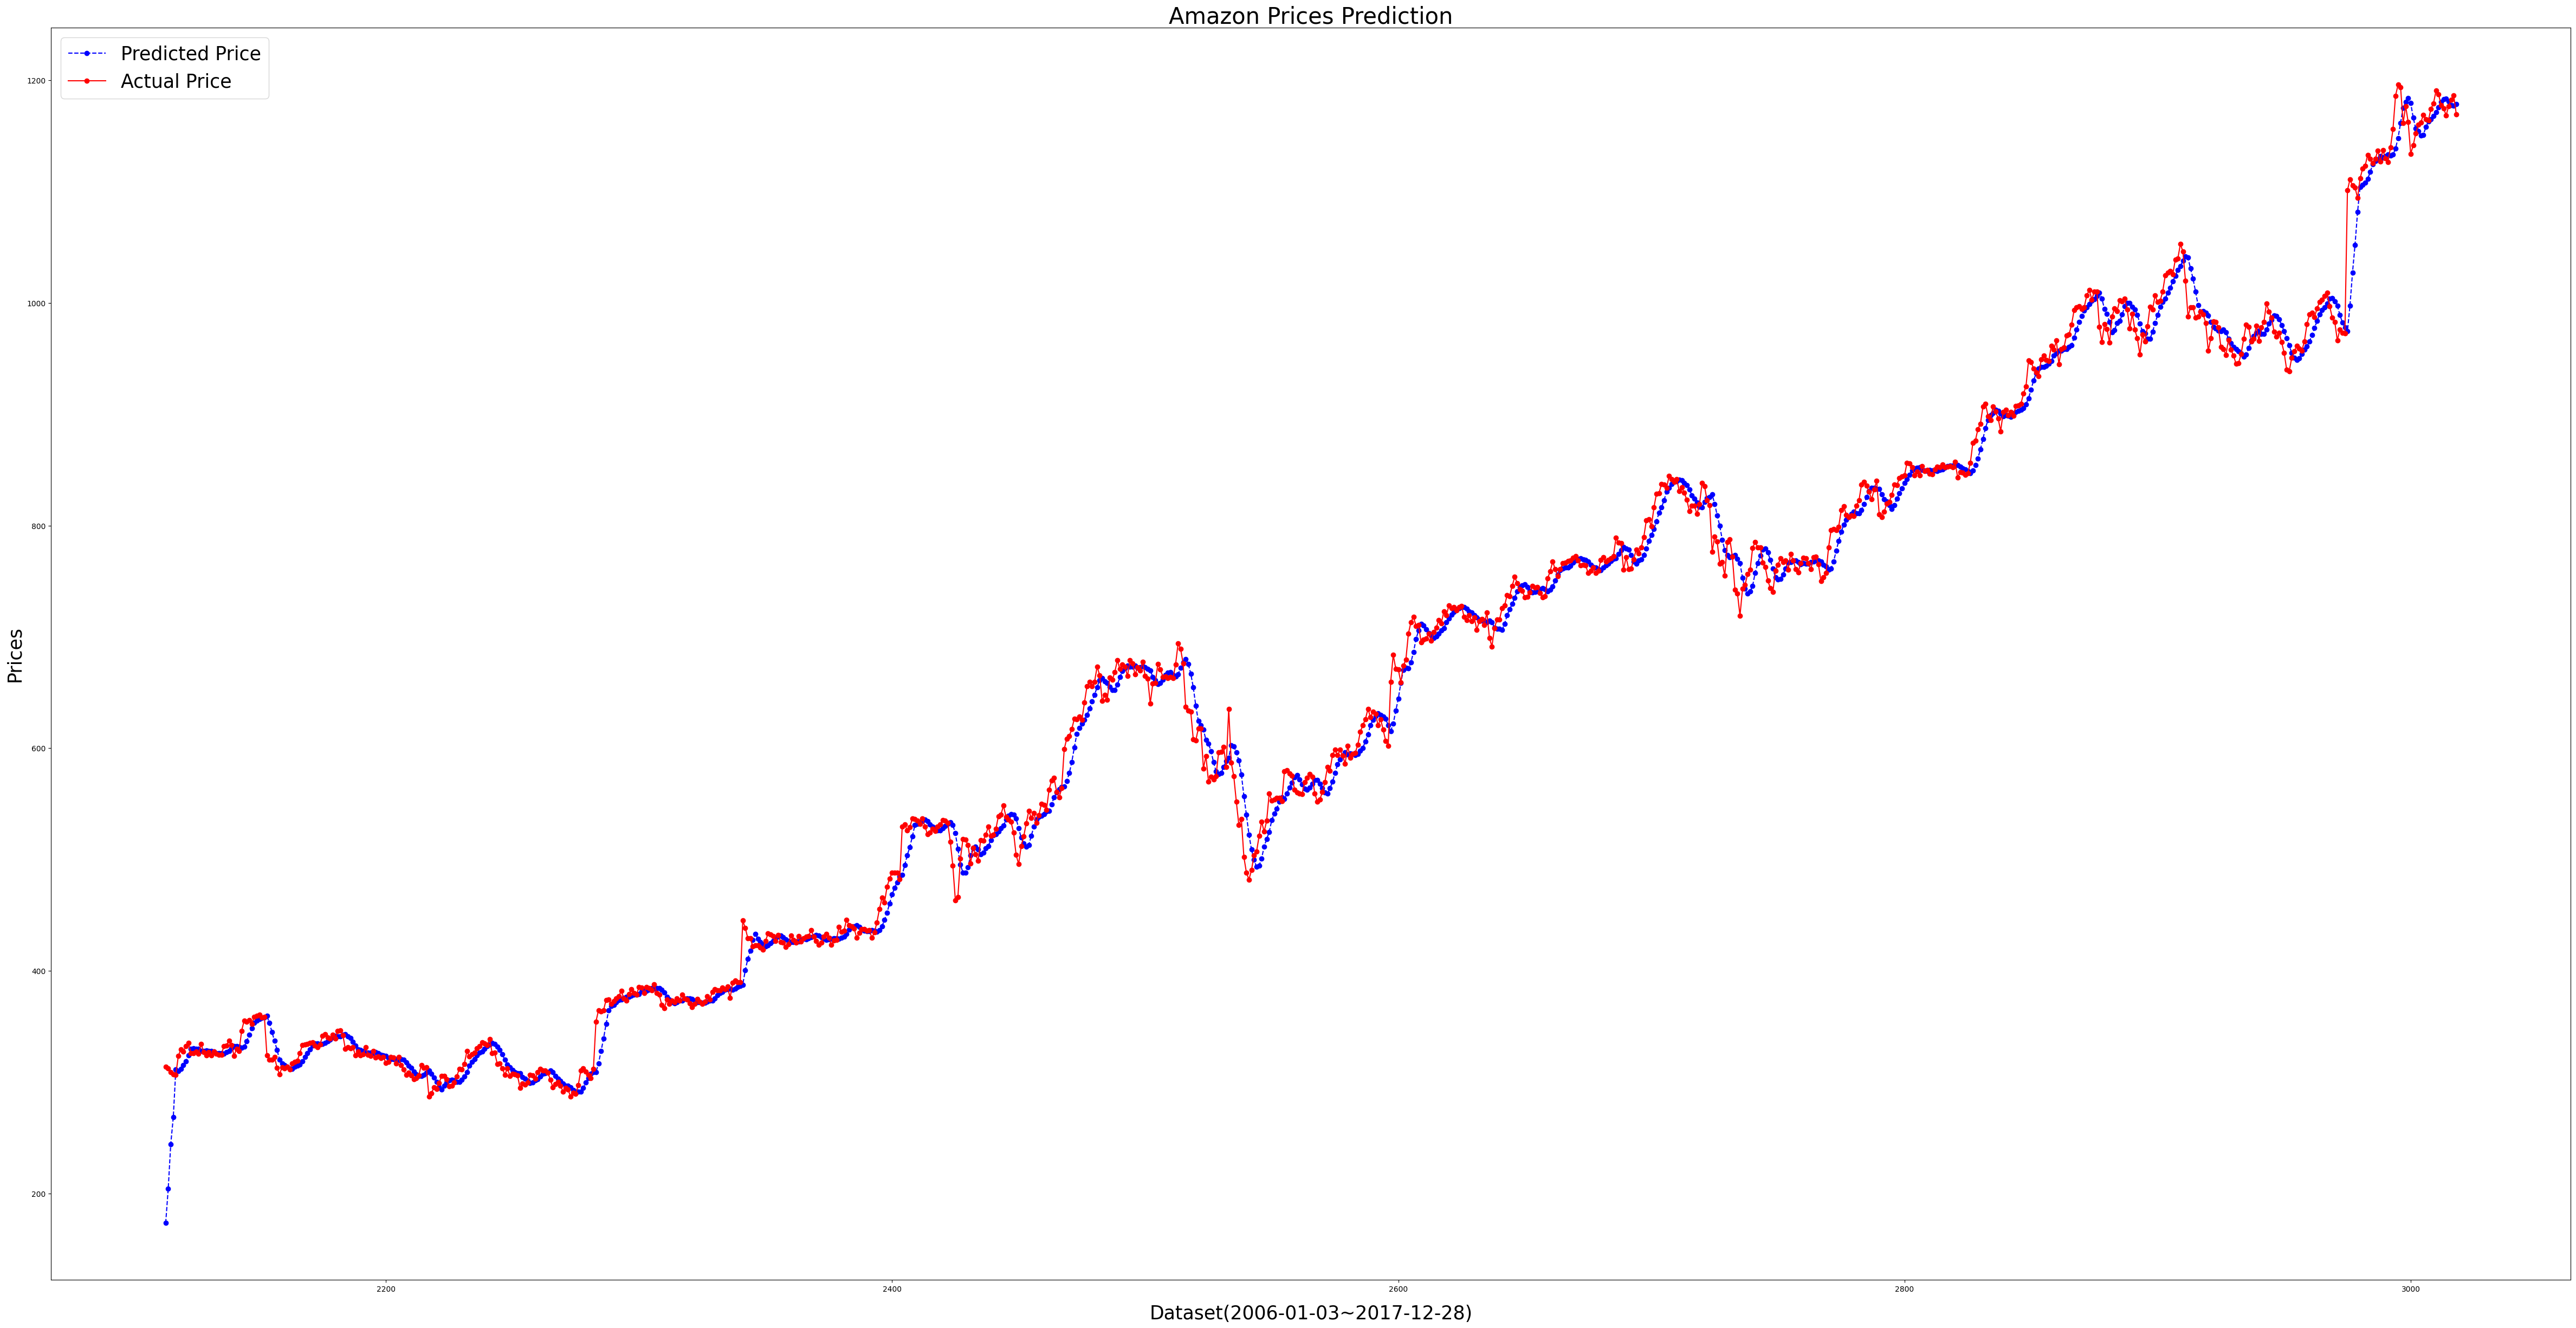

The accuracy of the prediction data is 98.00405754201196%


In [ ]:
test_set_range = Amazon[int(len(Amazon)*0.7):].index
plt.style.use('default')

font1 = {
         'color': 'black',
         'weight': 'normal',
         'size': 'xx-large'
         }

plt.figure(figsize=(60,30))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', marker='o', label='Actual Price')
plt.title('Amazon Prices Prediction', fontdict ={'size':30})
plt.xlabel('Dataset(2006-01-03~2017-12-28)', labelpad=15, fontdict={'size':25})
plt.ylabel('Prices', fontdict={'size':25})
plt.legend(loc='best', fontsize=25)
plt.show()

net_accuracy = 0

for i in range (0,len(test_data)):
  if model_predictions[i]>test_data[i]:
    accuracy = float(model_predictions[i]/test_data[i])-1
    accuracy = (1-accuracy)
    net_accuracy += accuracy

  elif model_predictions[i]<test_data[i]:
     accuracy = float(model_predictions[i]/test_data[i])
     net_accuracy += accuracy

net_accuracy = net_accuracy/len(test_data)
print(f"The accuracy of the prediction data is {net_accuracy*100}%")